<a href="https://colab.research.google.com/github/kevinegan31/ARGOS/blob/main/Coffee_Shop_Analytics/Coffee_Lab_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from Excel file
file_path = 'coffee_shop_data.csv'
coffee_shop_data = pd.read_csv(file_path)

In [207]:
df = coffee_shop_data.copy()
import hashlib

def name_to_hash(name):
    # Check if the name is not a string (possibly NaN)
    if not isinstance(name, str):
        return name  # Return the original value (likely NaN)

    # Using SHA256 as the hash function
    # We're encoding the string to utf-8 as hashlib requires a bytes-like object
    return hashlib.sha256(name.encode('utf-8')).hexdigest()



# Apply the hashing function to the 'Customer Name' column
df['Customer Name'] = df['Customer Name'].apply(name_to_hash)


In [212]:
df = df.drop(['Customer ID'], axis=1)

In [4]:
df['Customer Name'].isna().sum()

21571

In [94]:
df.columns

Index(['index', 'Time', 'Time Zone', 'Category', 'Item', 'Qty',
       'Price Point Name', 'SKU', 'Modifiers Applied', 'Gross Sales',
       'Discounts', 'Net Sales', 'Tax', 'Transaction ID', 'Payment ID',
       'Device Name', 'Notes', 'Details', 'Event Type', 'Location',
       'Dining Option', 'Customer ID', 'Customer Name',
       'Customer Reference ID', 'Unit', 'Count', 'Itemization Type',
       'Fulfillment Note', 'Weekday', 'Month', 'Year-Month'],
      dtype='object')

In [5]:
# Most popular products
product_popularity = df.groupby('Item')['Qty'].sum().sort_values(ascending=False)
print(product_popularity)


Item
Latte                               16969.0
Drip Coffee                          8596.0
Cold Brew                            7681.0
Iced Coffee                          3750.0
Cappuccino (Hot)                     2933.0
                                     ...   
Coffee Traveler Box (96oz)              3.0
Red Velvet Cupcake (Gluten Free)        2.0
Arnold Palmer                           1.0
Apple And Cheese Danish                 1.0
Brownie (Gluten Free, Vegan)            1.0
Name: Qty, Length: 109, dtype: float64


In [6]:
# Convert 'Time' column to a datetime object first
df['Time'] = pd.to_datetime(df['Time']).dt.hour  # Extracting the hour

popular_by_hour = df.groupby(['Time', 'Item'])['Qty'].sum().reset_index()
print(popular_by_hour)


     Time                         Item  Qty
0       3           Croissant - Almond  2.0
1       3  Genesis Espresso (12oz Bag)  1.0
2       6           Almond Maple Latte  2.0
3       6             Blueberry Muffin  3.0
4       6      Blueberry Pancake Latte  1.0
..    ...                          ...  ...
670    21                    Cold Brew  1.0
671    21                  Iced Coffee  1.0
672    21                 Matcha Latte  1.0
673    21          Pumpkin Spice Latte  1.0
674    22  Genesis Espresso (12oz Bag)  1.0

[675 rows x 3 columns]


In [7]:
# If you want to see the top-selling item for each hour:
top_item_per_hour = popular_by_hour.sort_values('Qty', ascending=False).drop_duplicates('Time')

print(top_item_per_hour)


     Time                                        Item     Qty
185     8                                       Latte  3990.0
287     9                                       Latte  3577.0
387    10                                       Latte  3086.0
85      7                                       Latte  2637.0
489    11                                       Latte  2319.0
585    12                                       Latte  1336.0
637    13                                   Cold Brew    18.0
18      6                                       Latte    14.0
663    15          Nicaragua Dark, Organic (12oz Bag)     2.0
662    14          Nicaragua Dark, Organic (12oz Bag)     2.0
666    17          Nicaragua Dark, Organic (12oz Bag)     2.0
0       3                          Croissant - Almond     2.0
671    21                                 Iced Coffee     1.0
668    19                     Lemon Bar (Gluten Free)     1.0
669    20  Nicaragua Light-Medium, Organic (12oz Bag)     1.0
667    1

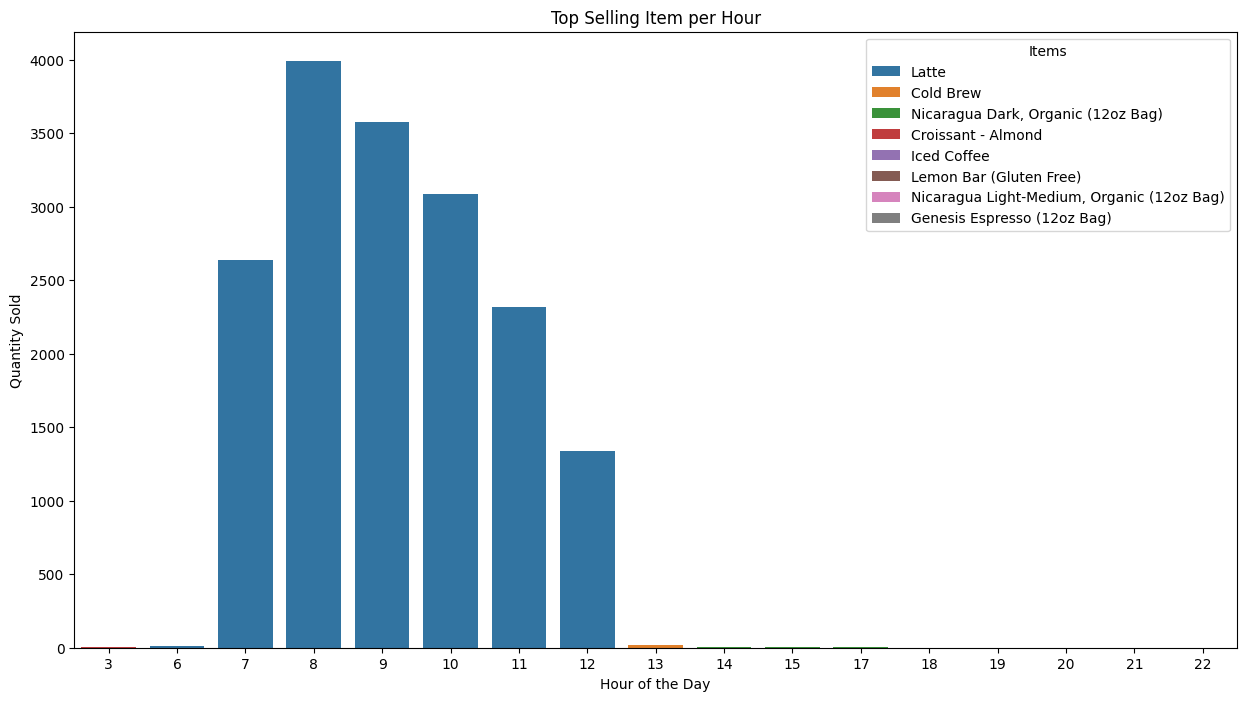

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization of quantity of top items sold per hour
plt.figure(figsize=(15, 8))
sns.barplot(data=top_item_per_hour, x='Time', y='Qty', hue='Item', dodge=False)
plt.title("Top Selling Item per Hour")
plt.ylabel("Quantity Sold")
plt.xlabel("Hour of the Day")
plt.legend(title="Items", loc="upper right")
plt.show()


In [9]:
# Group by 'Item' and sum the 'Qty' to find the total quantity sold of each item
items_popularity = df.groupby('Item')['Qty'].sum().reset_index()

# Sort by 'Qty' in descending order and pick the top 5
top_10_items = items_popularity.sort_values(by='Qty', ascending=False).head(10)

print(top_10_items)


                           Item      Qty
63                        Latte  16969.0
46                  Drip Coffee   8596.0
31                    Cold Brew   7681.0
59                  Iced Coffee   3750.0
20             Cappuccino (Hot)   2933.0
3                     Americano   2759.0
16   Brown Sugar Cinnamon Latte   2311.0
102                       Scone   1925.0
40      Croissant - Ham & Swiss   1752.0
24                   Chai Latte   1675.0


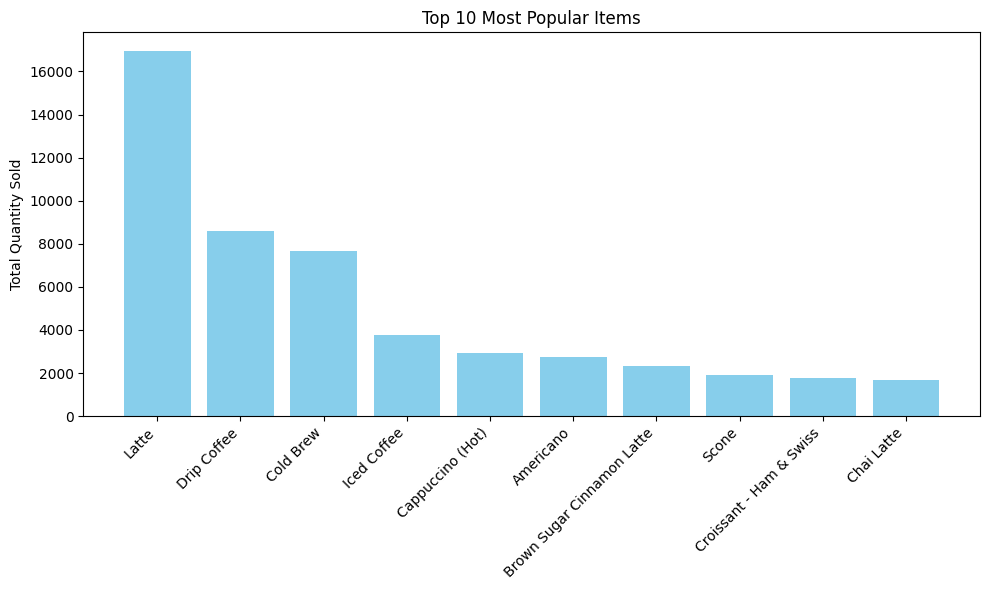

In [10]:
import matplotlib.pyplot as plt

# Visualization of top 5 items
plt.figure(figsize=(10, 6))
plt.bar(top_10_items['Item'], top_10_items['Qty'], color='skyblue')
plt.ylabel("Total Quantity Sold")
plt.title("Top 10 Most Popular Items")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [11]:
missing_values = df['Net Sales'].isnull().sum()
print(f"Number of missing values in 'Net Sales': {missing_values}")
# df['Net Sales'] = df['Net Sales'].str.replace(',', '').astype(float)
df['Net Sales'] = df['Net Sales'].str.replace('$', '').astype(float)
# df['Net Sales'] = df['Net Sales'].str.strip().astype(float)

Number of missing values in 'Net Sales': 0


<ipython-input-11-7a799cc51a42>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Net Sales'] = df['Net Sales'].str.replace('$', '').astype(float)


In [12]:
daily_sales = df.groupby('Date')['Net Sales'].sum()

In [13]:
daily_sales.head()

Date
2022-09-25    1648.85
2022-09-26    1220.12
2022-09-27    1079.87
2022-09-28    1116.62
2022-09-29    1198.13
Name: Net Sales, dtype: float64

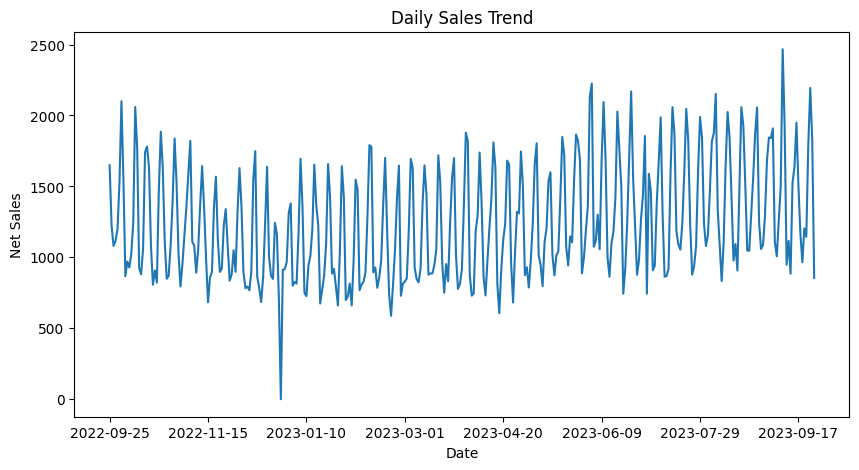

In [14]:
import matplotlib.pyplot as plt

# Daily sales trend
daily_sales = df.groupby('Date')['Net Sales'].sum()
daily_sales.plot(figsize=(10, 5))
plt.title('Daily Sales Trend')
plt.ylabel('Net Sales')
plt.show()

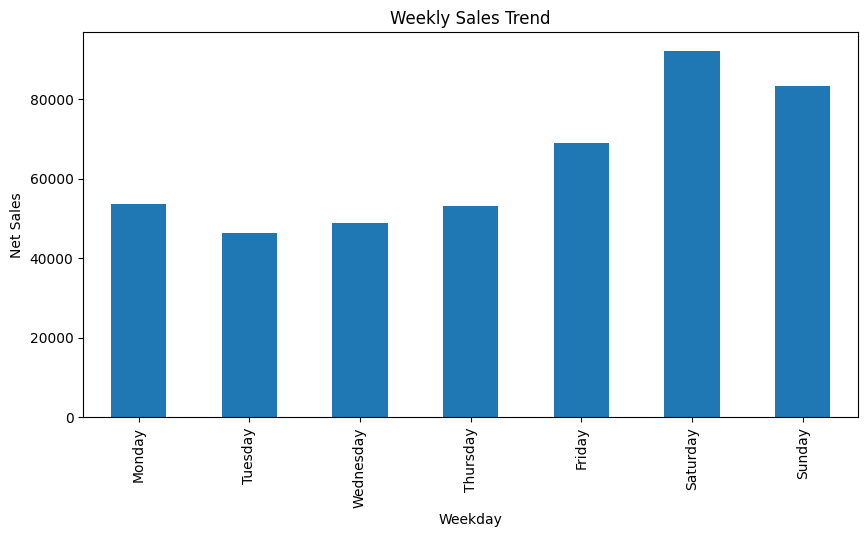

In [15]:
# Weekly sales trend
df['Weekday'] = pd.to_datetime(df['Date']).dt.day_name()
weekday_sales = df.groupby('Weekday')['Net Sales'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekday_sales.plot(kind='bar', figsize=(10, 5))
plt.title('Weekly Sales Trend')
plt.ylabel('Net Sales')
plt.show()



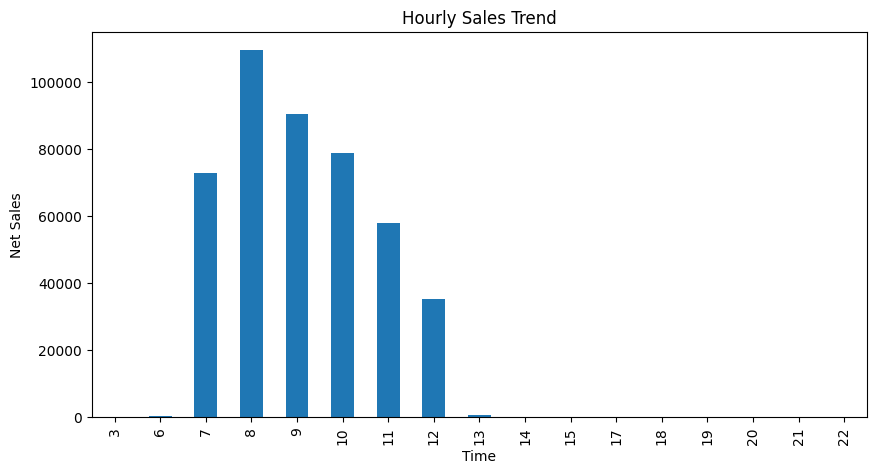

In [16]:
hourly_sales = df.groupby('Time')['Net Sales'].sum()
hourly_sales.plot(kind='bar', figsize=(10, 5))
plt.title('Hourly Sales Trend')
plt.ylabel('Net Sales')
plt.show()


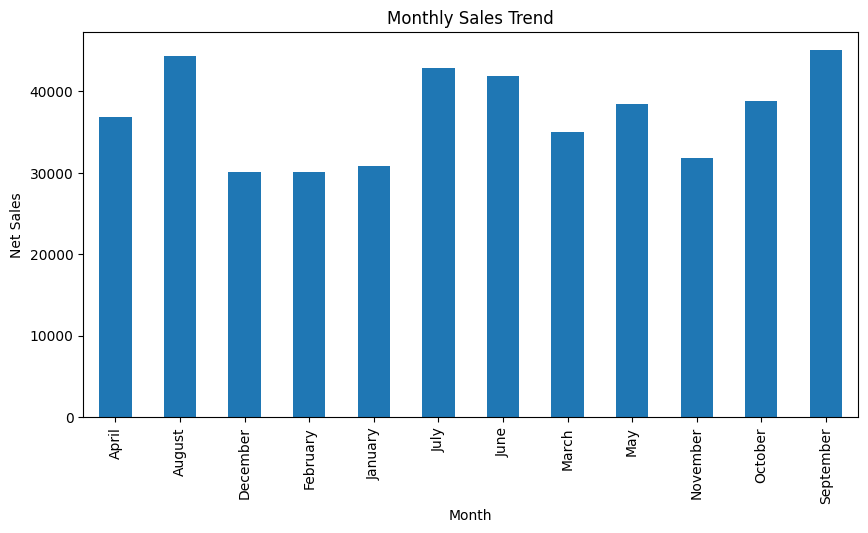

In [17]:
# Monthly sales trend
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()
monthly_sales = df.groupby('Month')['Net Sales'].sum()  # You may need to reorder the months if necessary.
monthly_sales.plot(kind='bar', figsize=(10, 5))
plt.title('Monthly Sales Trend')
plt.ylabel('Net Sales')
plt.show()


In [18]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Once converted, create the 'Year-Month' column
df['Year-Month'] = df['Date'].dt.strftime('%Y-%m')


In [19]:
print(df['Year-Month'].head())

0    2023-09
1    2023-09
2    2023-09
3    2023-09
4    2023-09
Name: Year-Month, dtype: object


In [20]:
df['Year-Month'].value_counts()

2023-08    7370
2023-07    6959
2023-06    6913
2022-10    6611
2023-05    6392
2023-09    6167
2023-04    6106
2023-03    5910
2022-11    5335
2023-01    5097
2023-02    5036
2022-12    4797
2022-09    1306
Name: Year-Month, dtype: int64

In [26]:
# Dropping 2022-09 since that was the month shop opened
df = df[df['Year-Month'] != '2022-09']

In [27]:
# Monthly aggregation
monthly_sales = df.groupby(['Year-Month', 'Item'])['Net Sales'].sum().reset_index()


In [28]:
monthly_sales.head()

,Year-Month,Item,Net Sales
0,2022-10,"Almond Date Bar (Gluten Free, Vegan)",74.75
1,2022-10,Americano,948.50
2,2022-10,Blueberry Muffin,501.50
3,2022-10,Brazil Medium-Dark (12oz Bag),340.00
4,2022-10,Brown Sugar Cinnamon Latte,2245.85


In [29]:
top_20_items = df.groupby('Item')['Qty'].sum().nlargest(20).index.tolist()
top_20_items

['Latte',
 'Drip Coffee',
 'Cold Brew',
 'Iced Coffee',
 'Cappuccino (Hot)',
 'Americano',
 'Brown Sugar Cinnamon Latte',
 'Scone',
 'Croissant - Ham & Swiss',
 'Chai Latte',
 'Blueberry Muffin',
 'Matcha Latte',
 'Croissant - Plain',
 'Croissant - Almond',
 'Cortado (Hot)',
 'Quiche - Spinach & Feta',
 'Cinnamon Roll',
 'Quiche - Tomato & Basil',
 'Mocha',
 'Quiche - Ham & Cheddar']

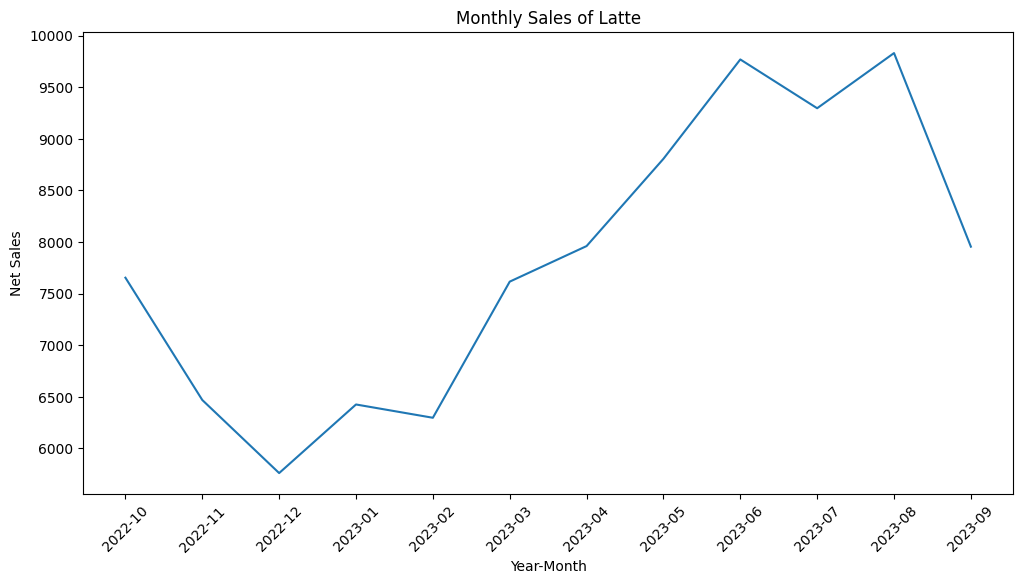

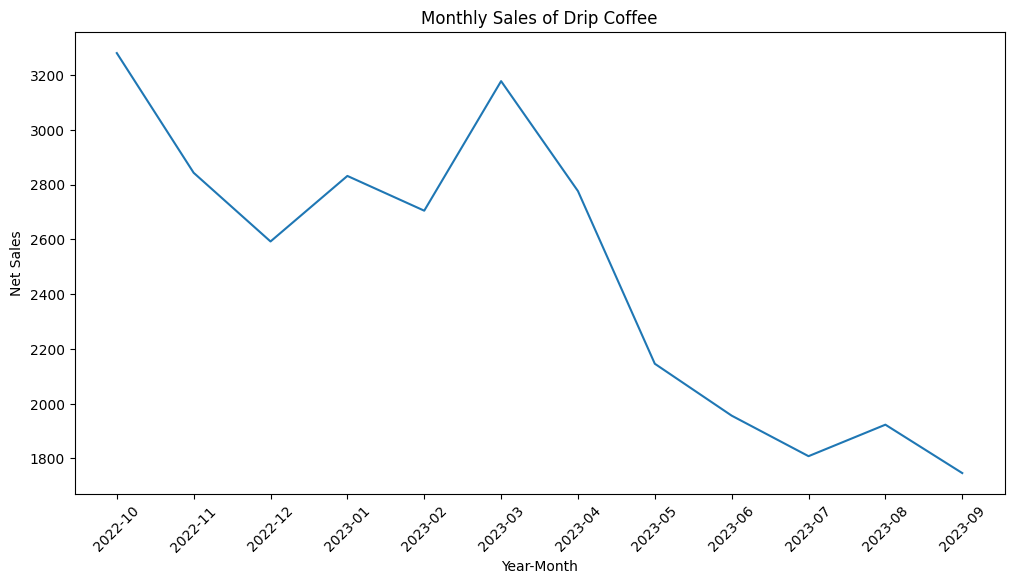

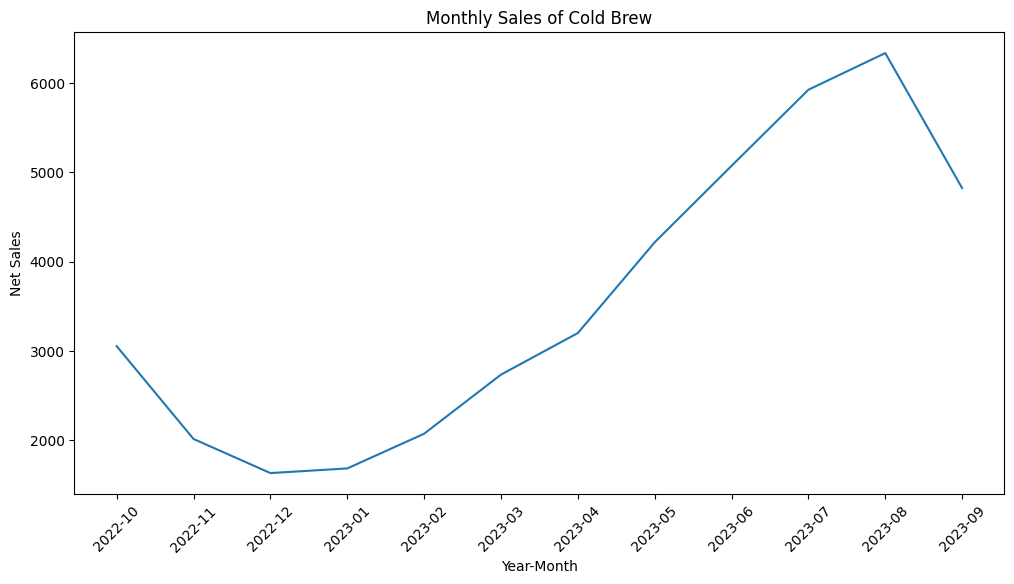

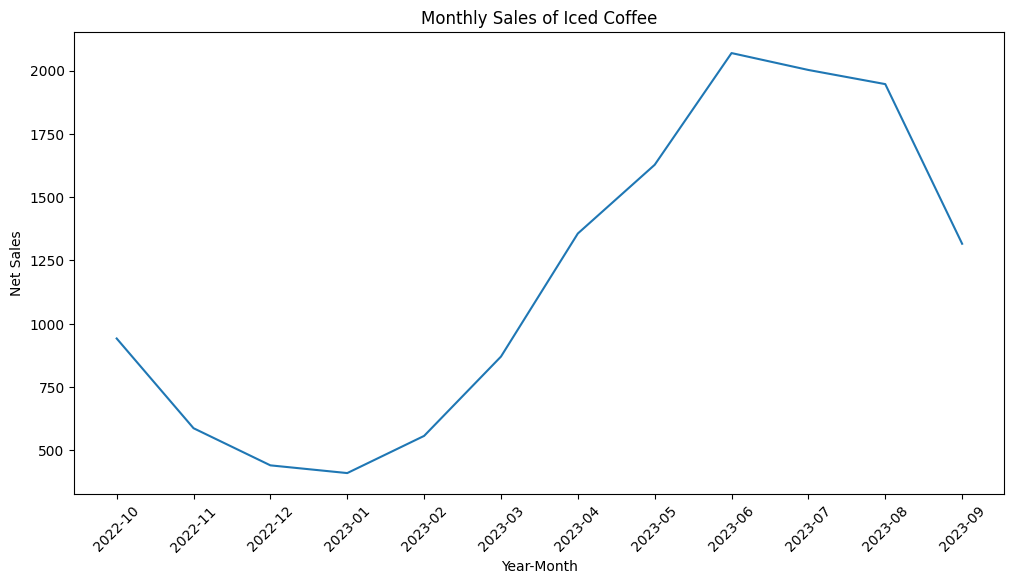

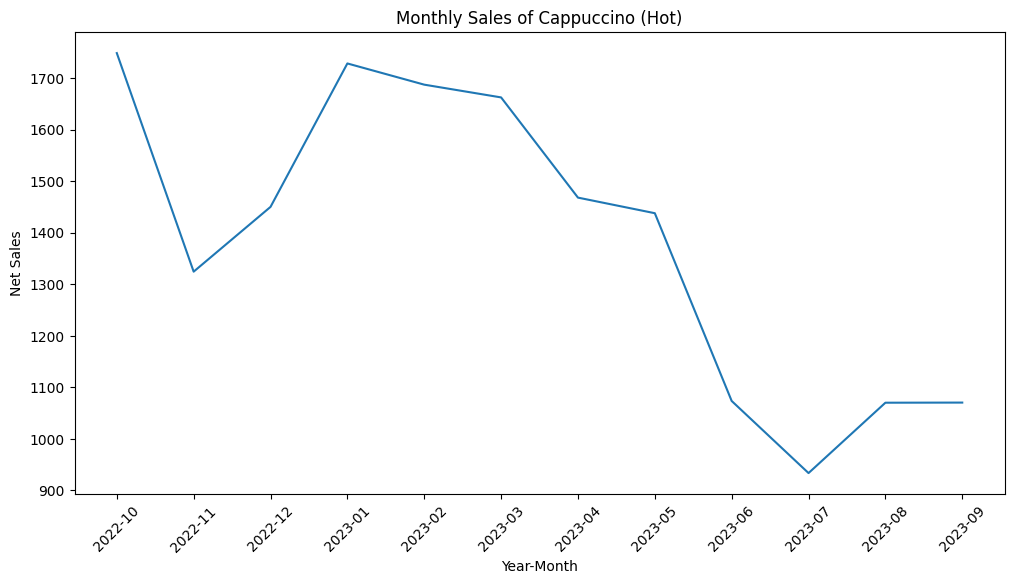

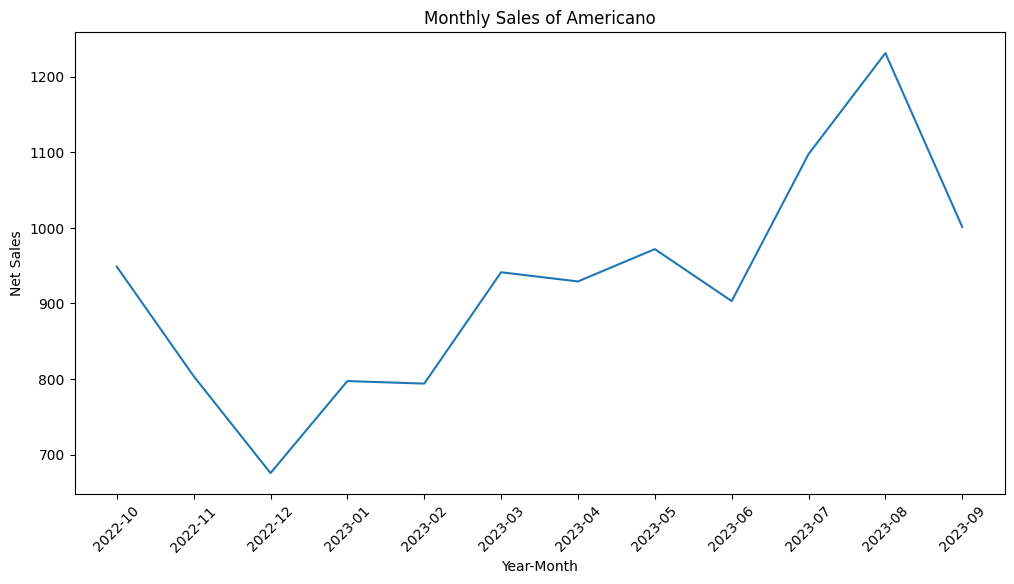

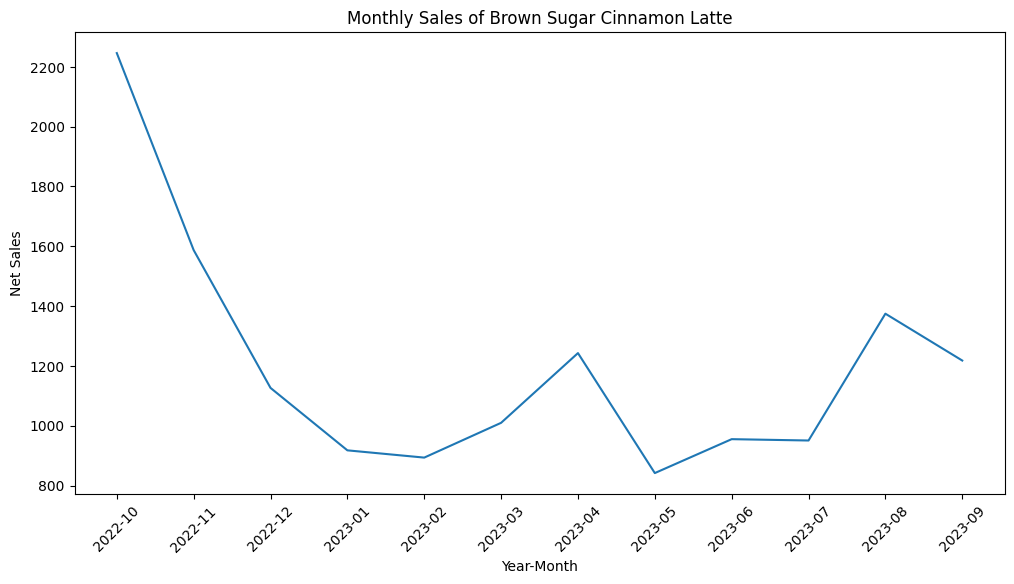

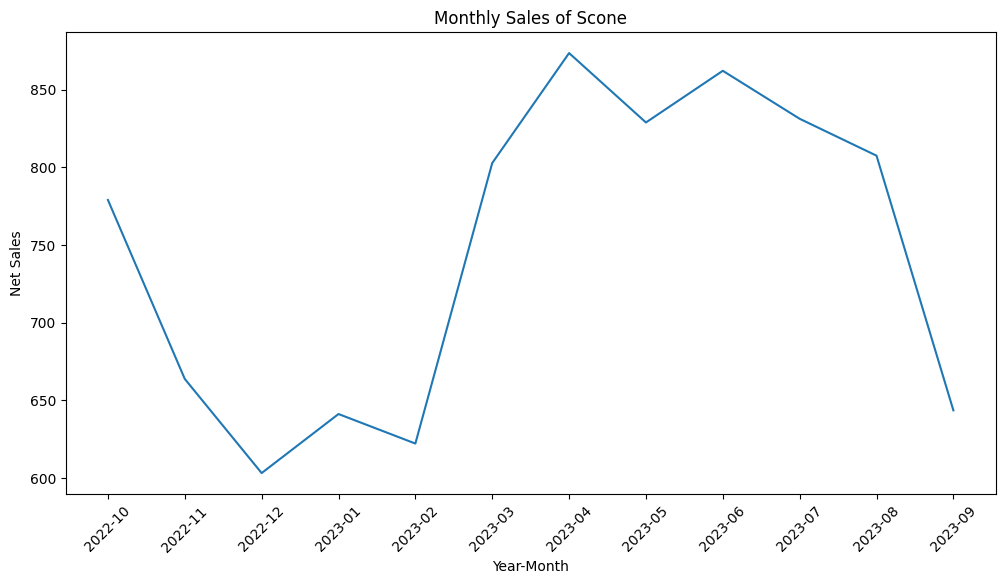

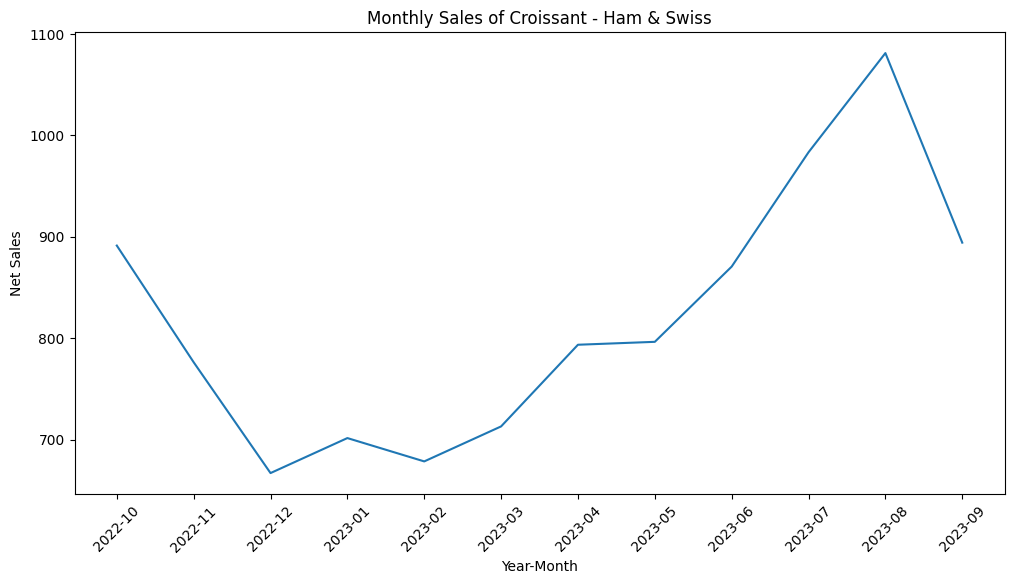

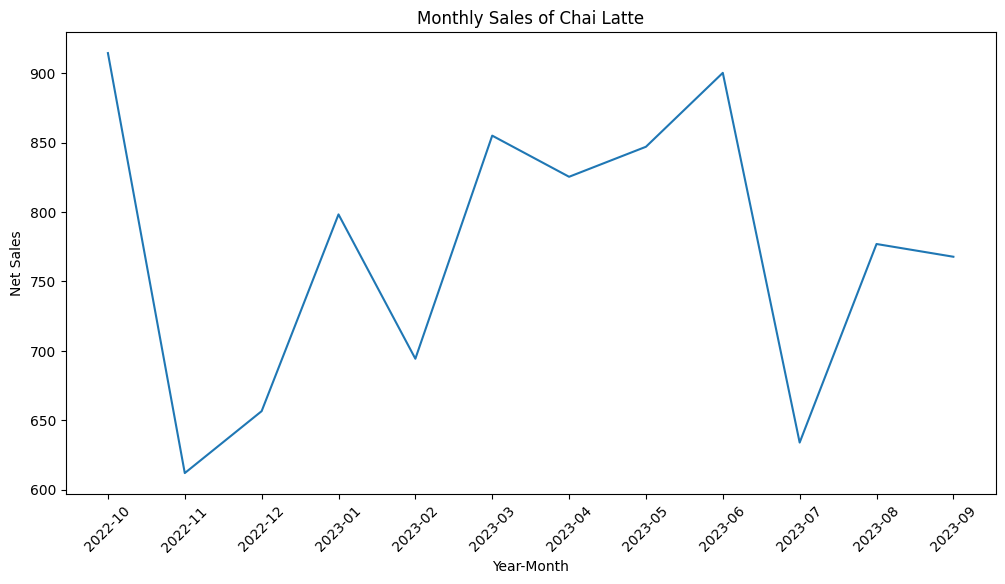

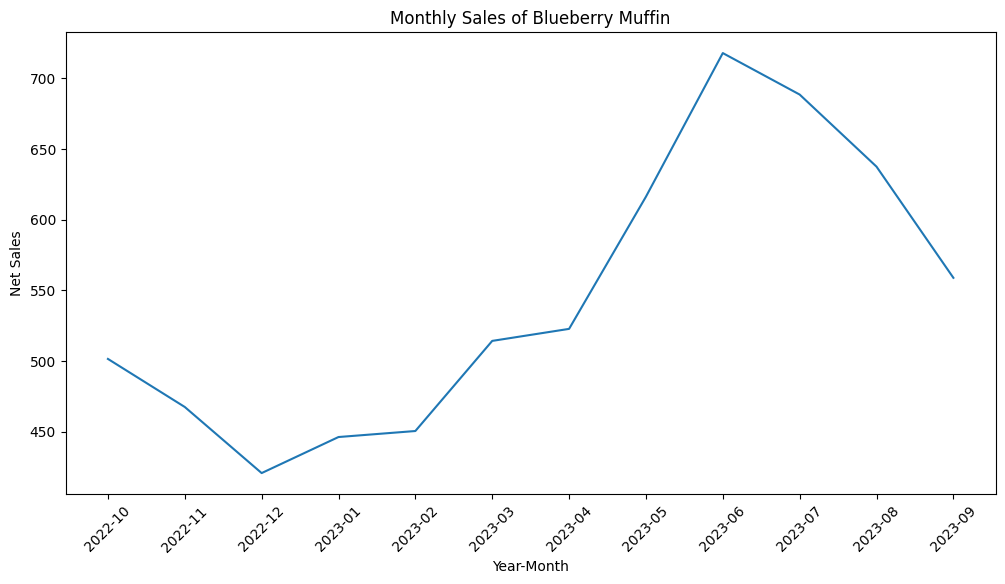

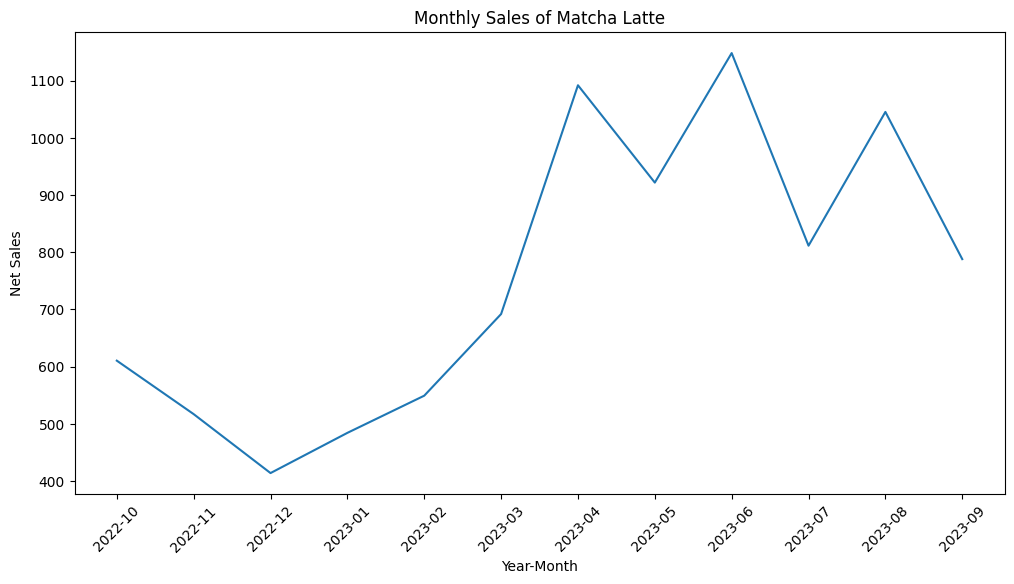

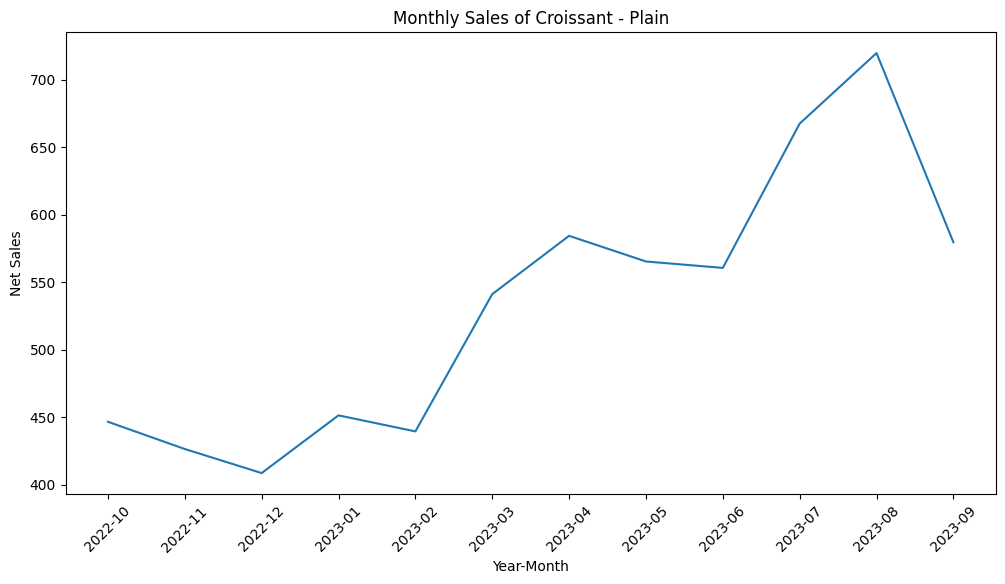

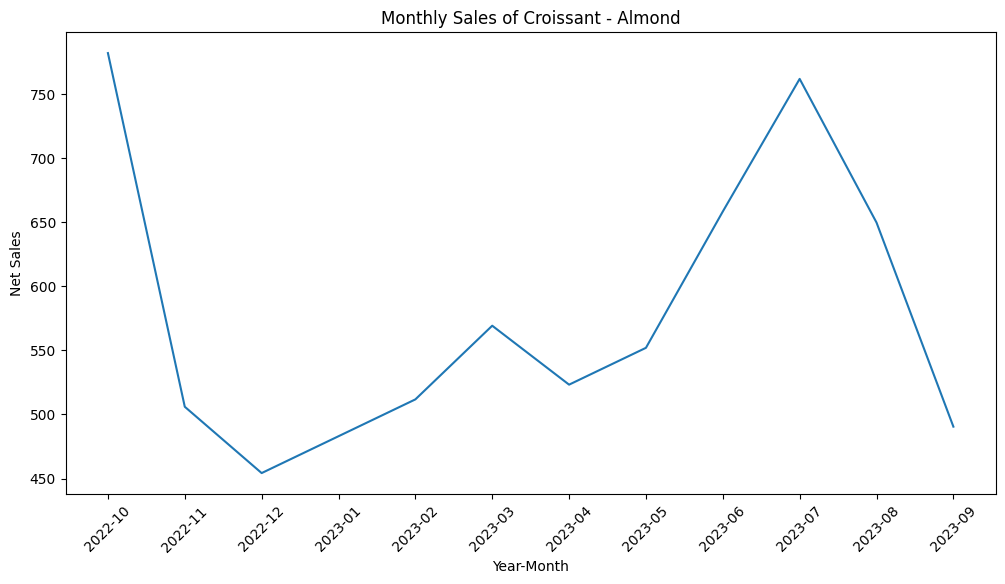

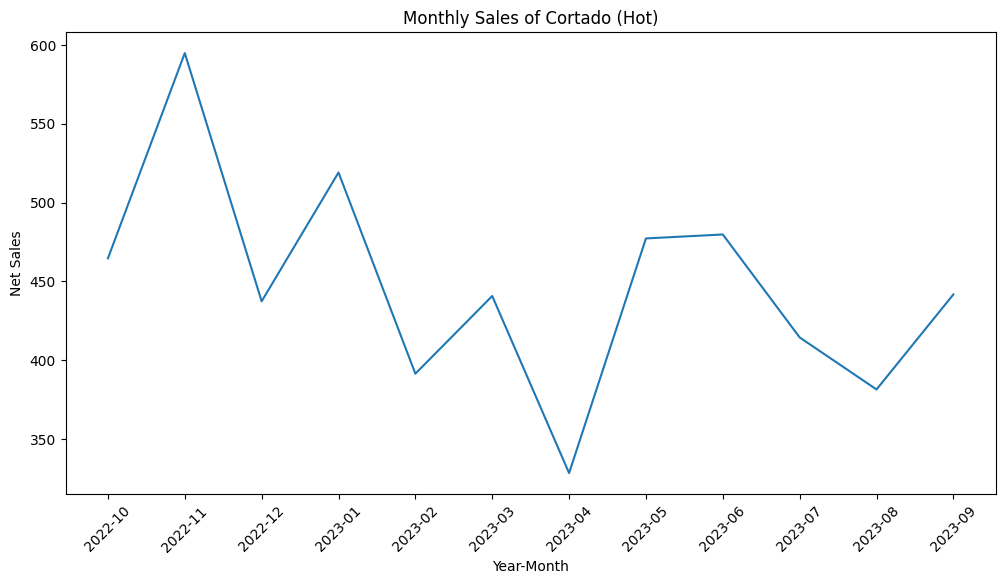

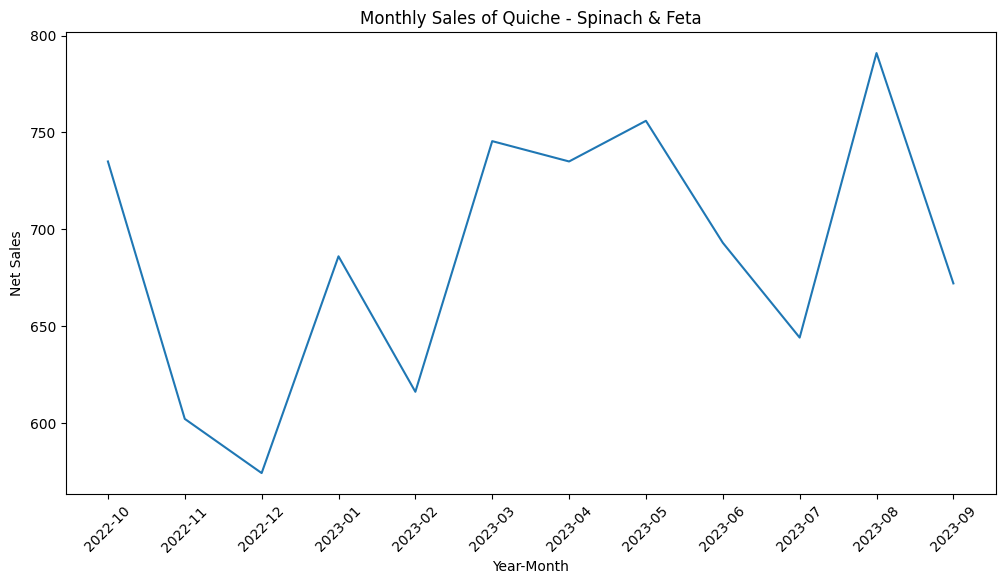

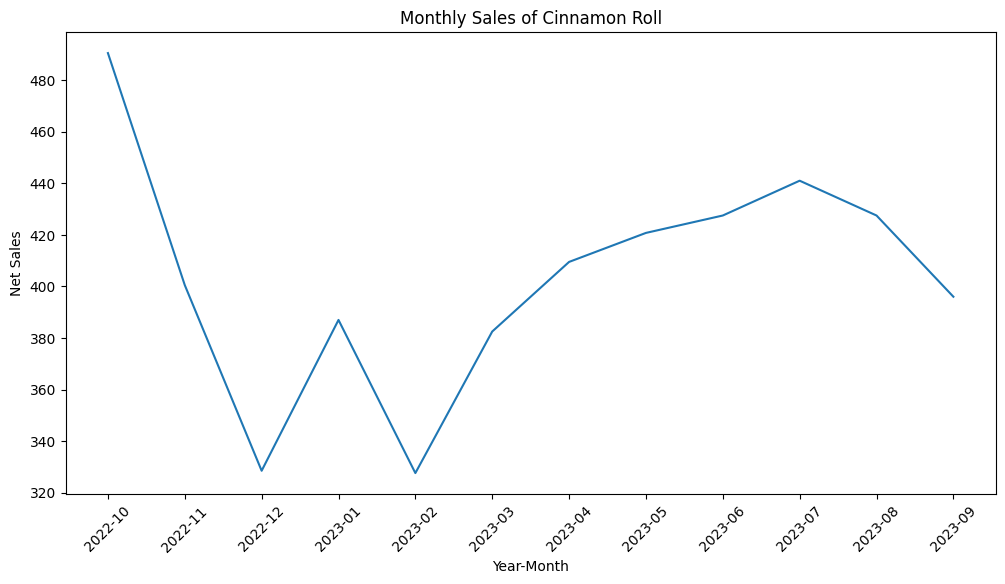

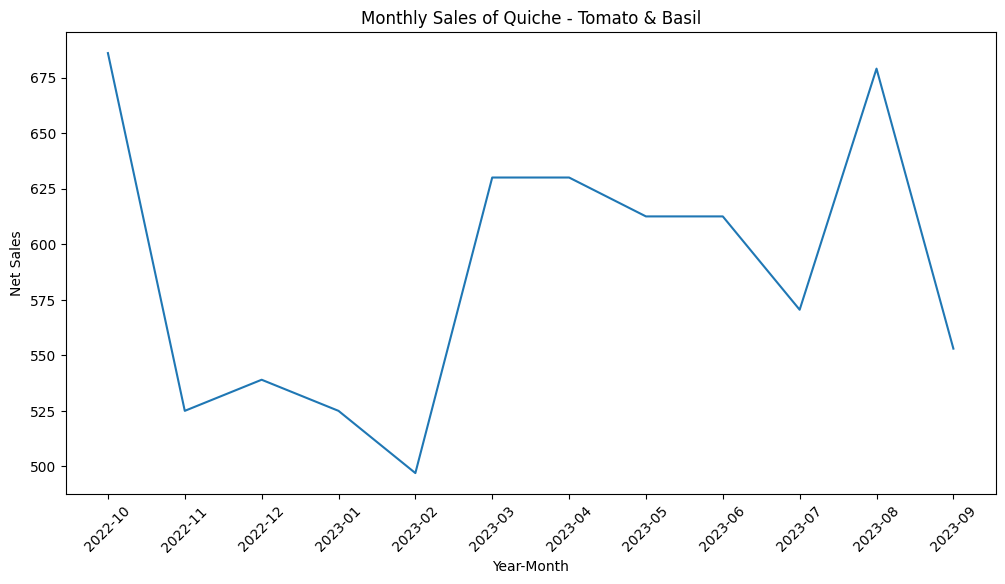

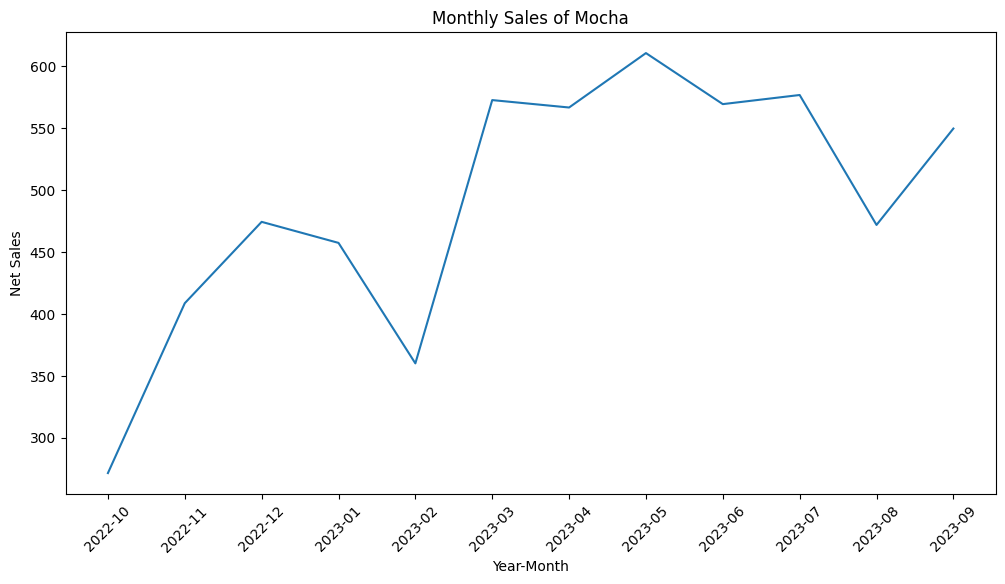

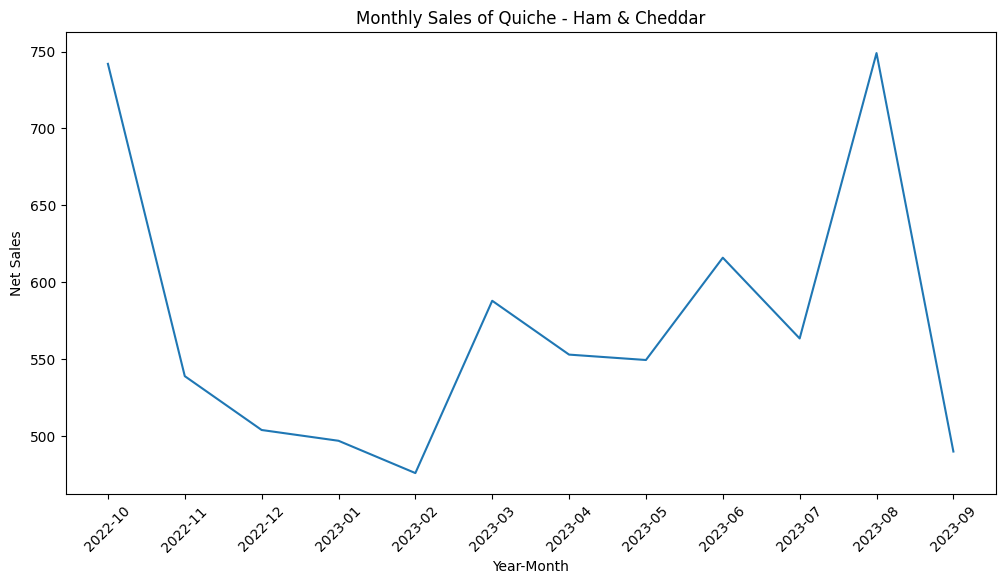

In [30]:
# Loop through each item in the top 10 list and visualize its monthly sales
for product in top_20_items:
    filtered_data = monthly_sales[monthly_sales['Item'] == product]

    plt.figure(figsize=(12, 6))
    sns.lineplot(x=filtered_data['Year-Month'], y=filtered_data['Net Sales'])

    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.title(f'Monthly Sales of {product}')
    plt.show()


In [32]:
# Monthly aggregation
monthly_qty = df.groupby(['Year-Month', 'Item'])['Qty'].sum().reset_index()


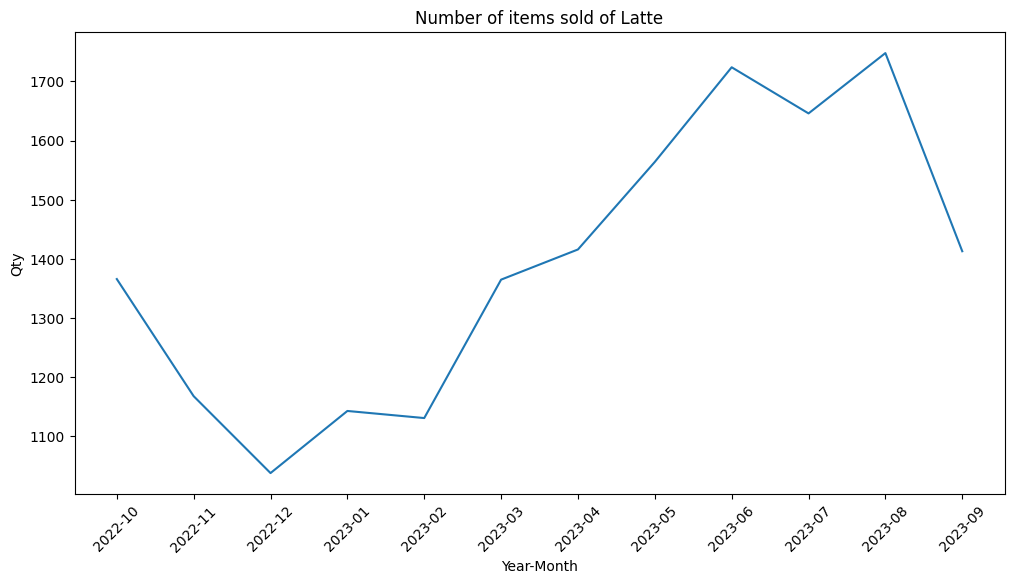

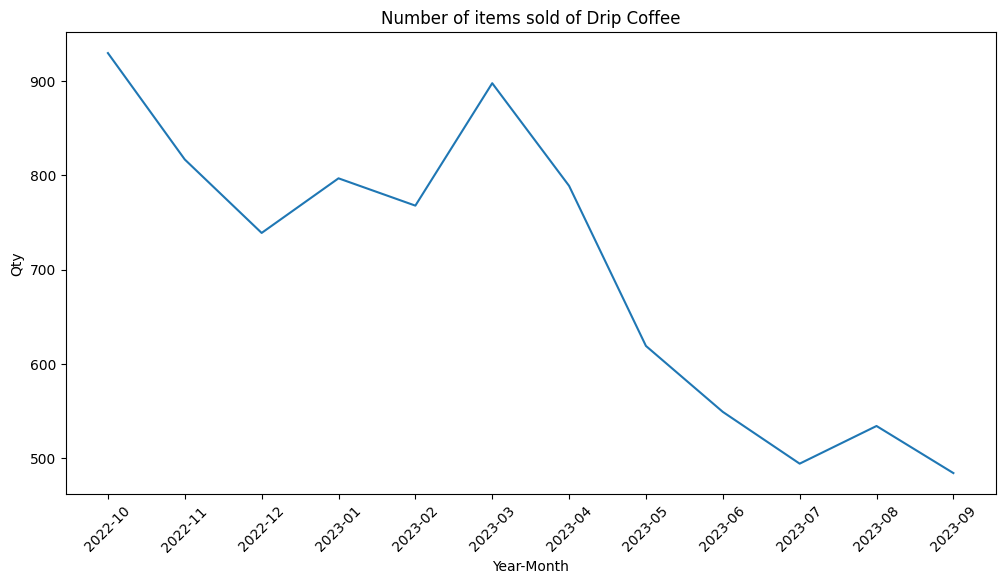

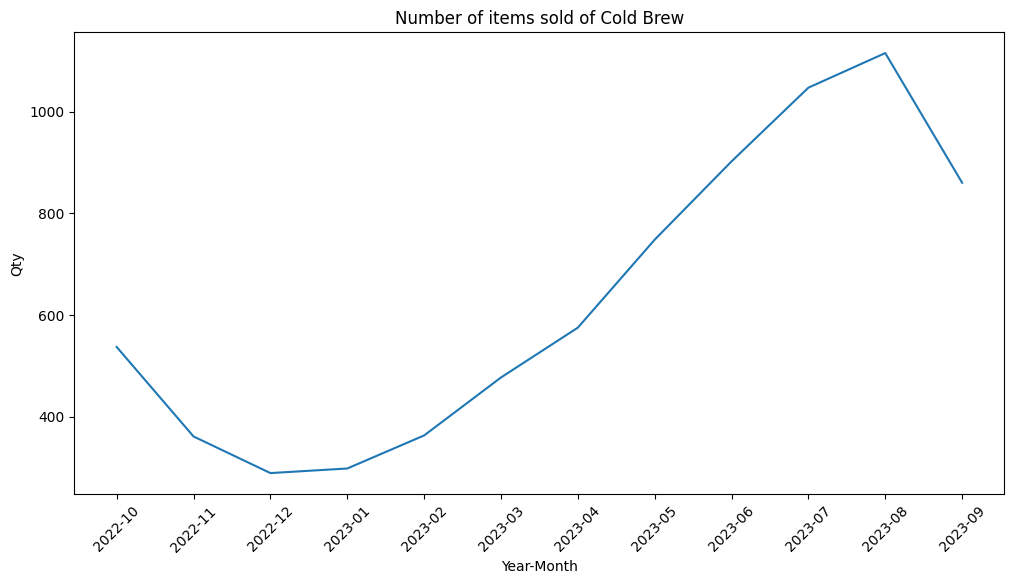

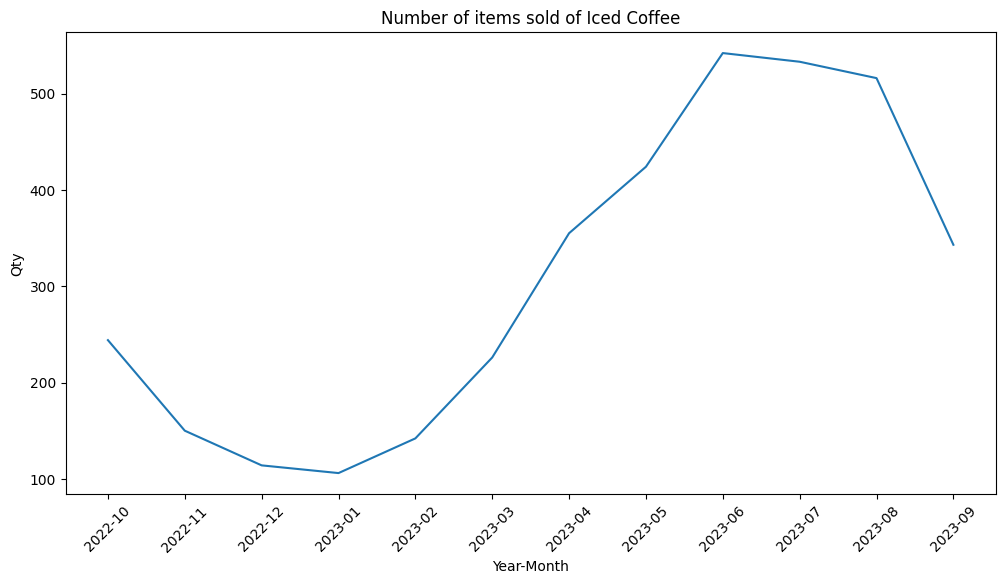

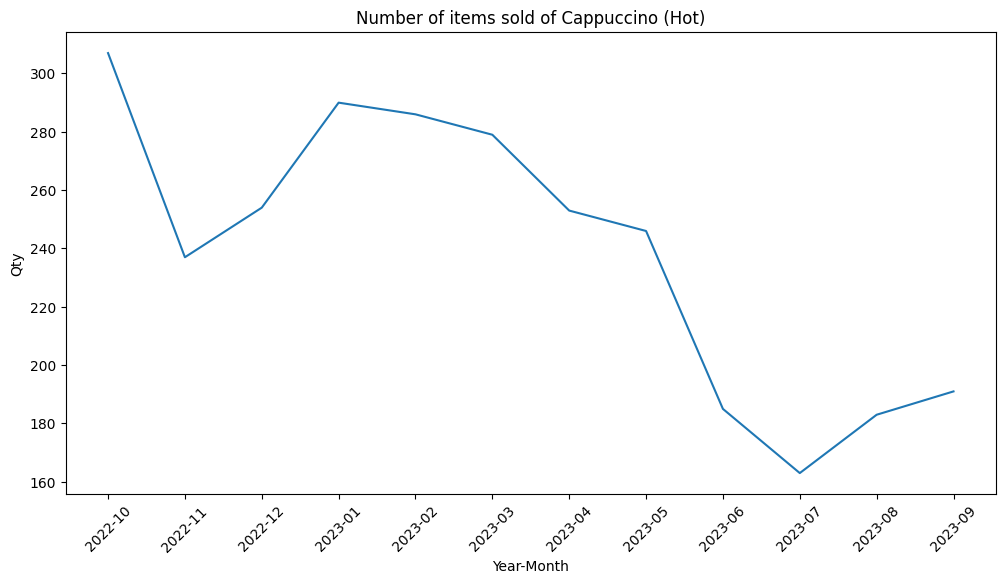

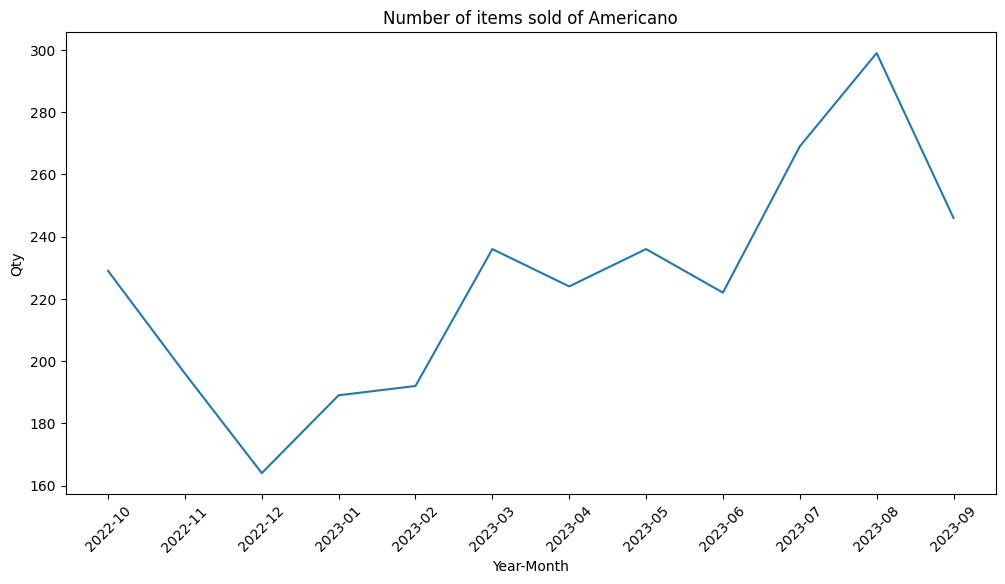

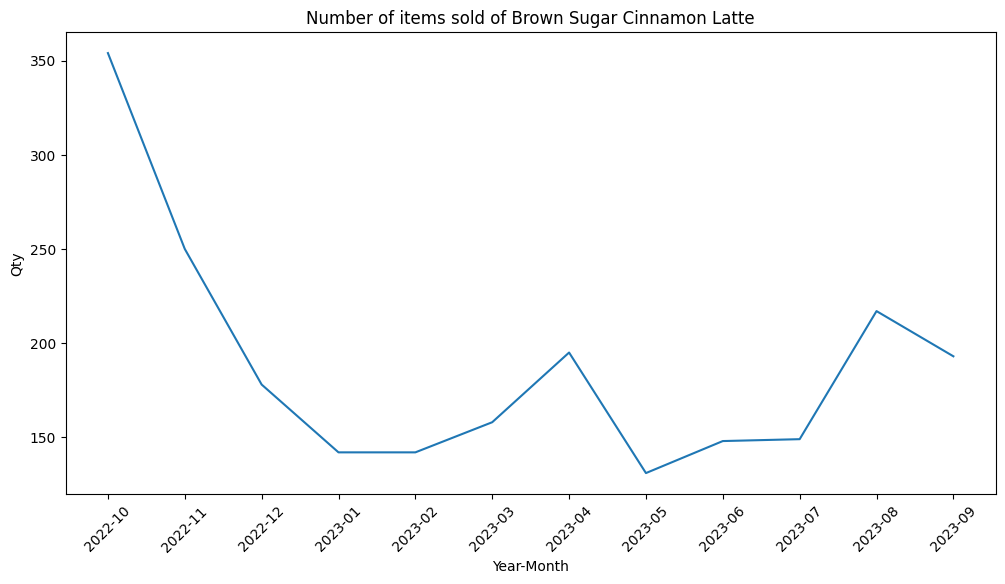

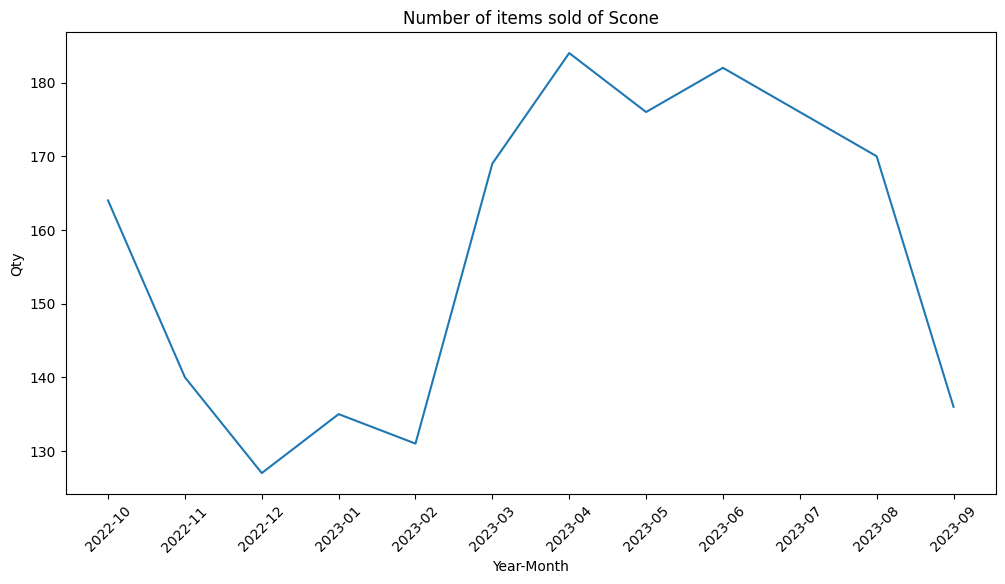

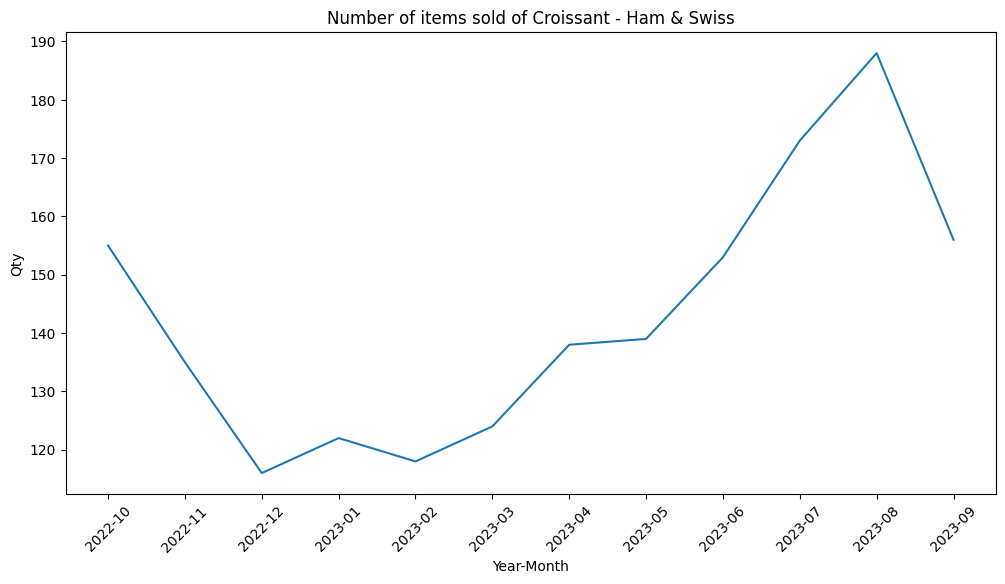

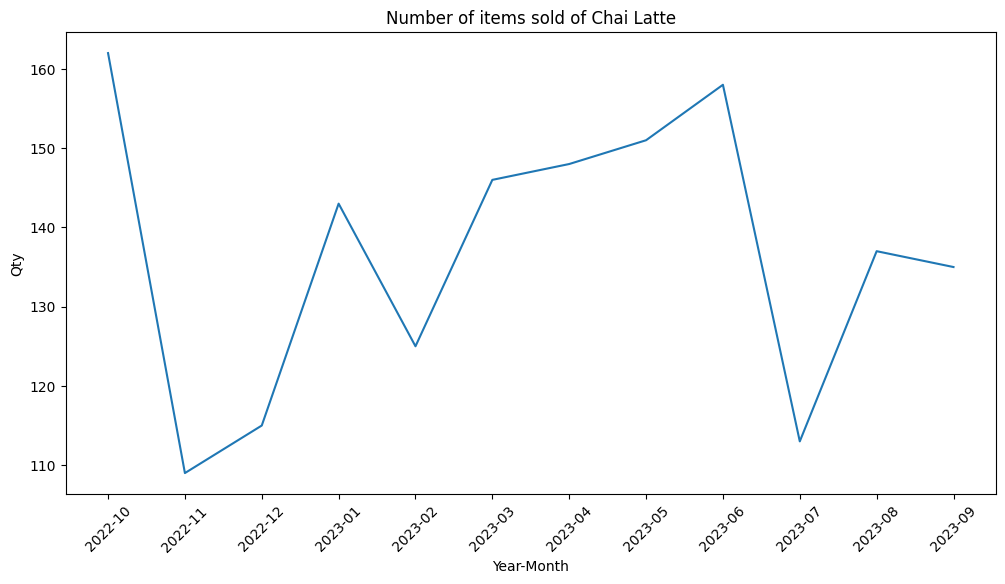

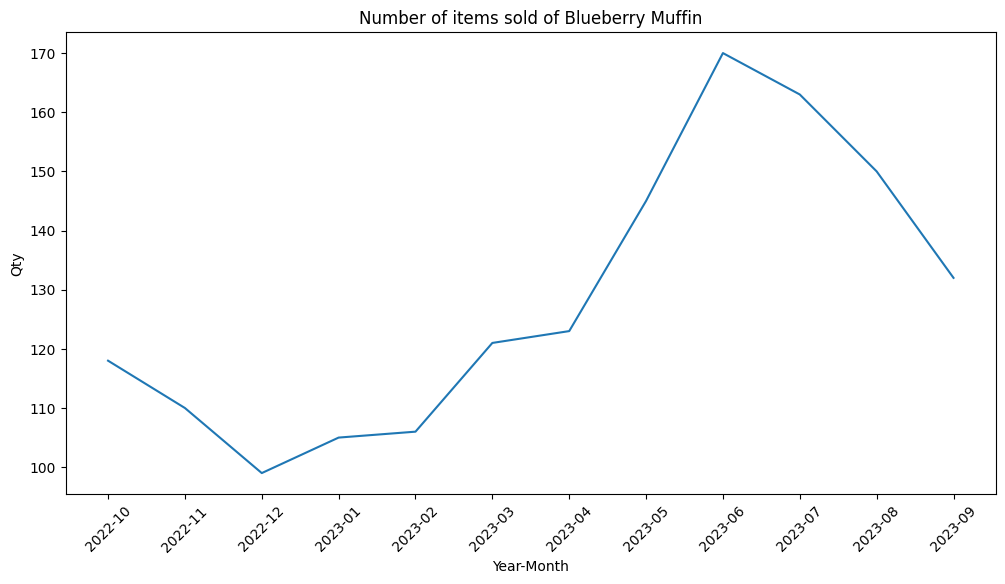

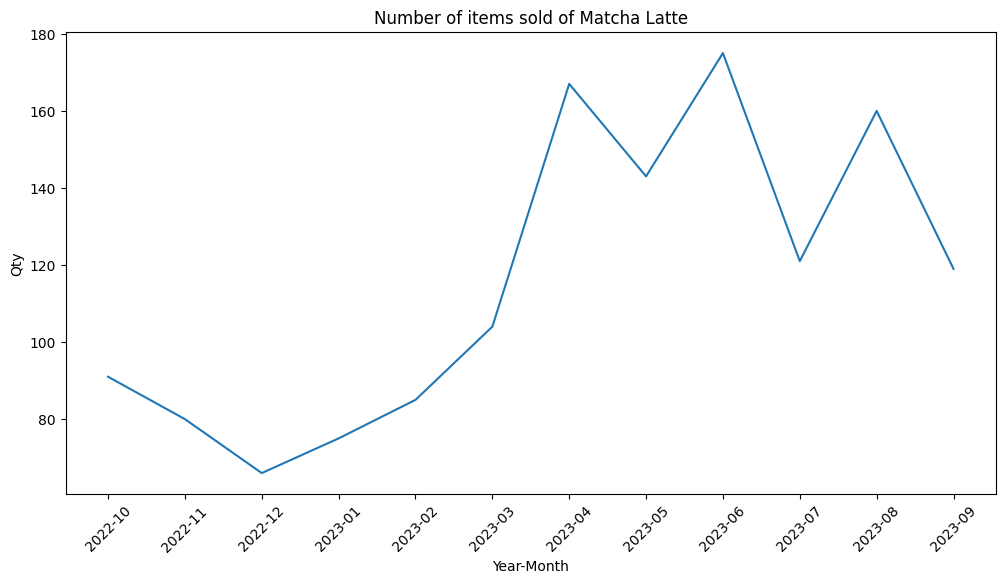

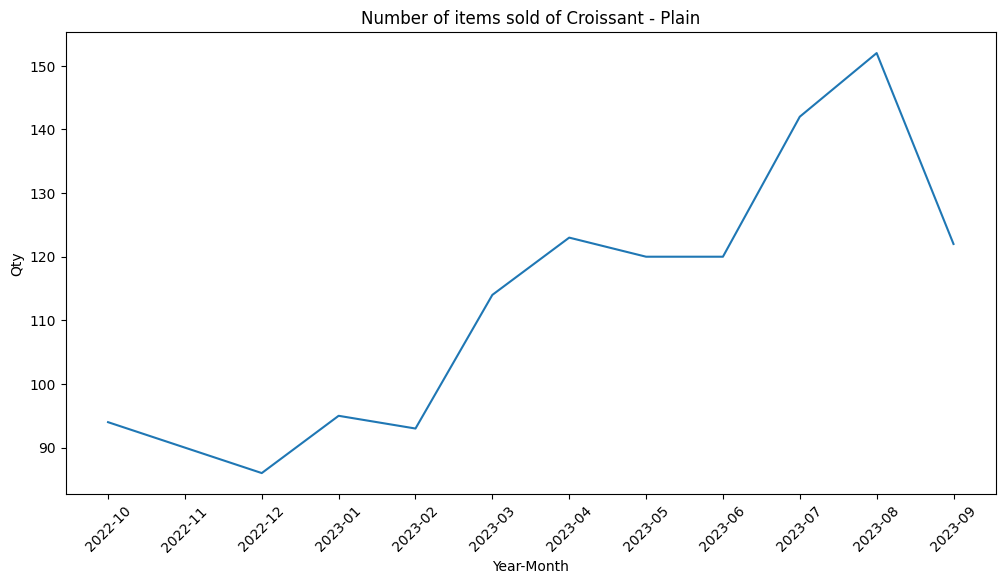

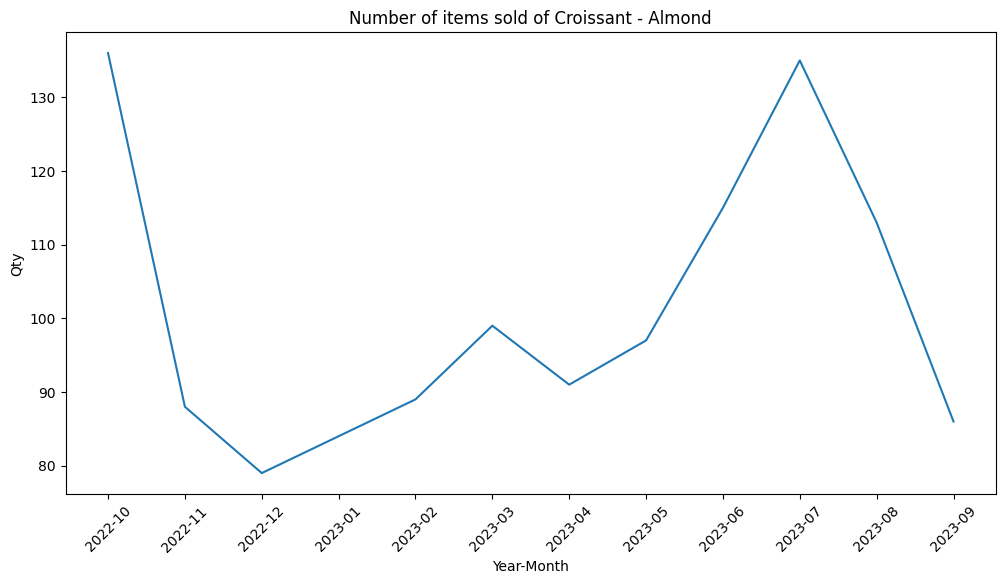

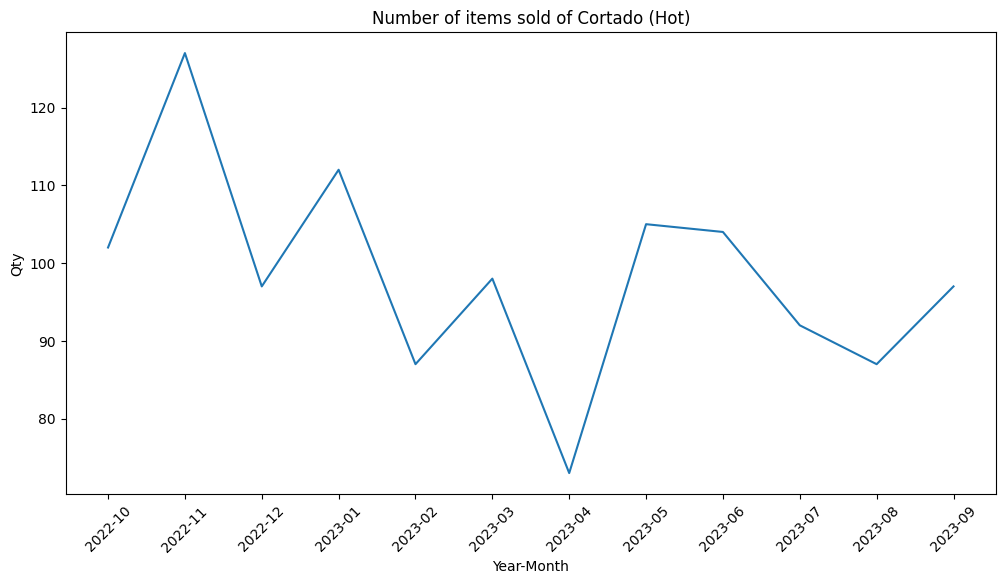

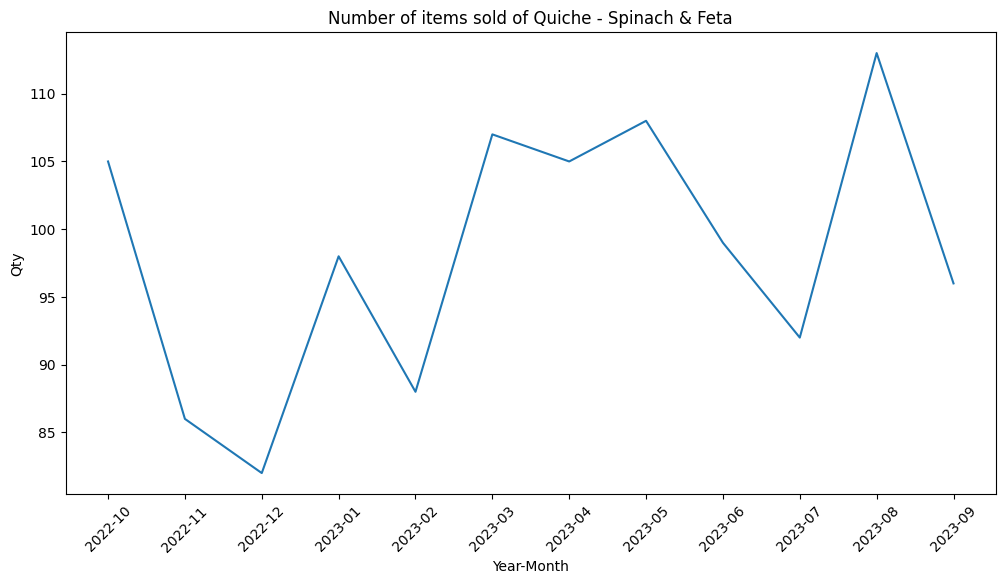

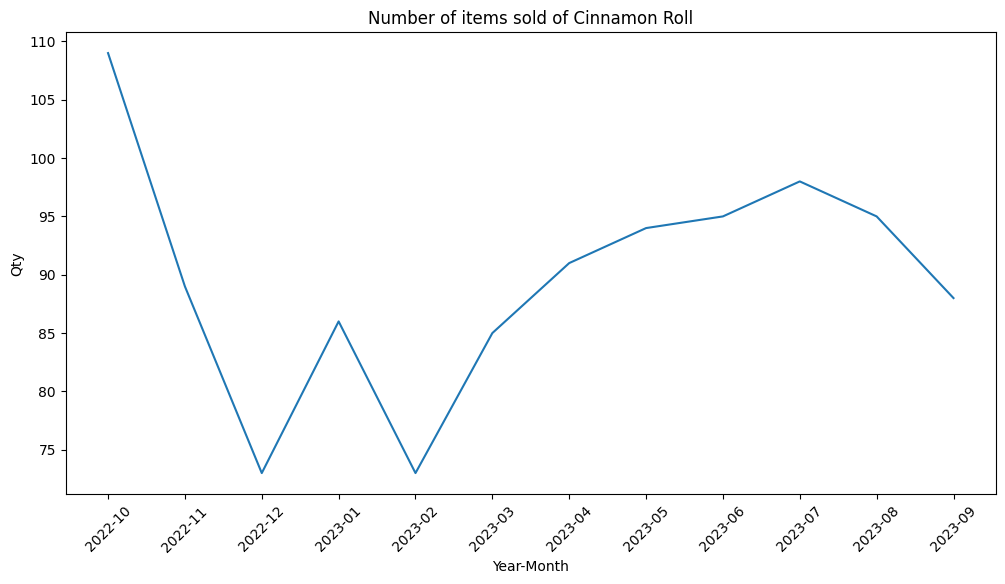

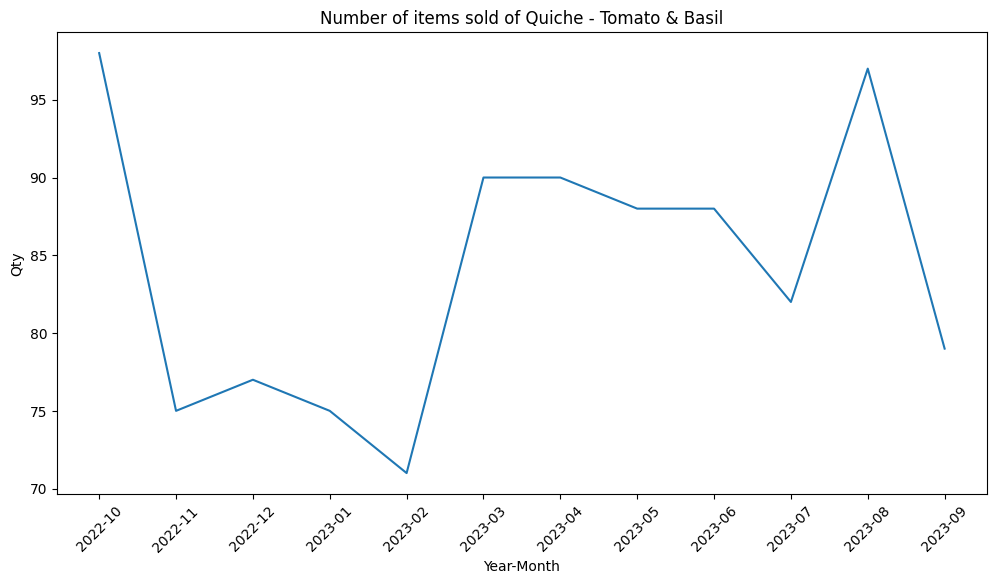

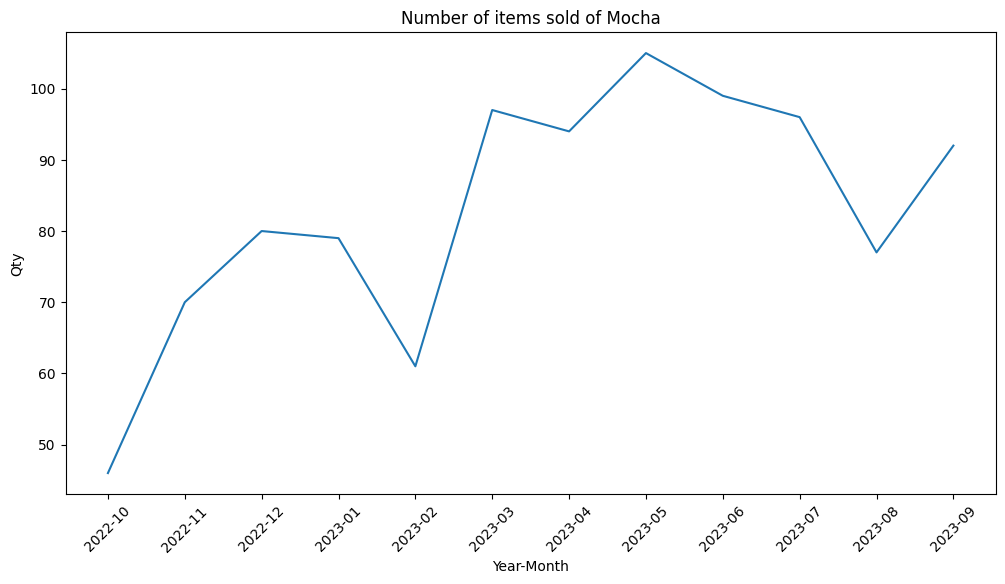

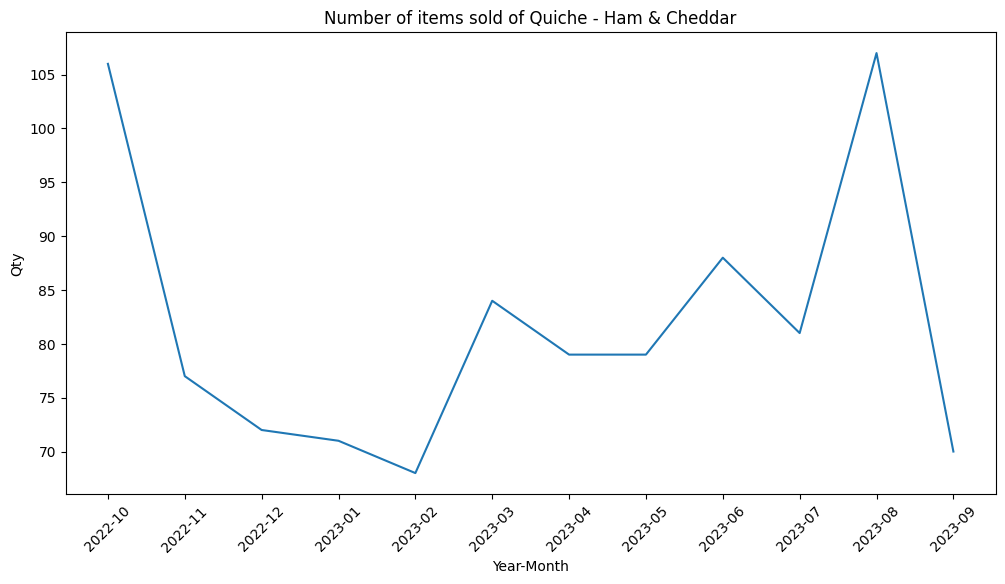

In [33]:
# Loop through each item in the top 10 list and visualize its monthly sales
for product in top_20_items:
    filtered_data = monthly_qty[monthly_qty['Item'] == product]

    plt.figure(figsize=(12, 6))
    sns.lineplot(x=filtered_data['Year-Month'], y=filtered_data['Qty'])

    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.title(f'Number of items sold of {product}')
    plt.show()


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
# Assuming your dataframe is named df and has columns 'Date', 'Item', and 'Net Sales'
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
# Filter data to start from October 2022
# start_date = '2022-10'
# filtered_data = df[df['Year-Month'] >= start_date]
# df = filtered_data.copy()
# Filter data for cold brew and iced coffee
cold_brew_sales = df[df['Item'] == 'Cold Brew']['Net Sales']
iced_coffee_sales = df[df['Item'] == 'Iced Coffee']['Net Sales']

cold_brew_weekly = cold_brew_sales.resample('W').sum()
cold_brew_weekly = cold_brew_weekly[:-1]
iced_coffee_weekly = iced_coffee_sales.resample('W').sum()
iced_coffee_weekly = iced_coffee_weekly[:-1]

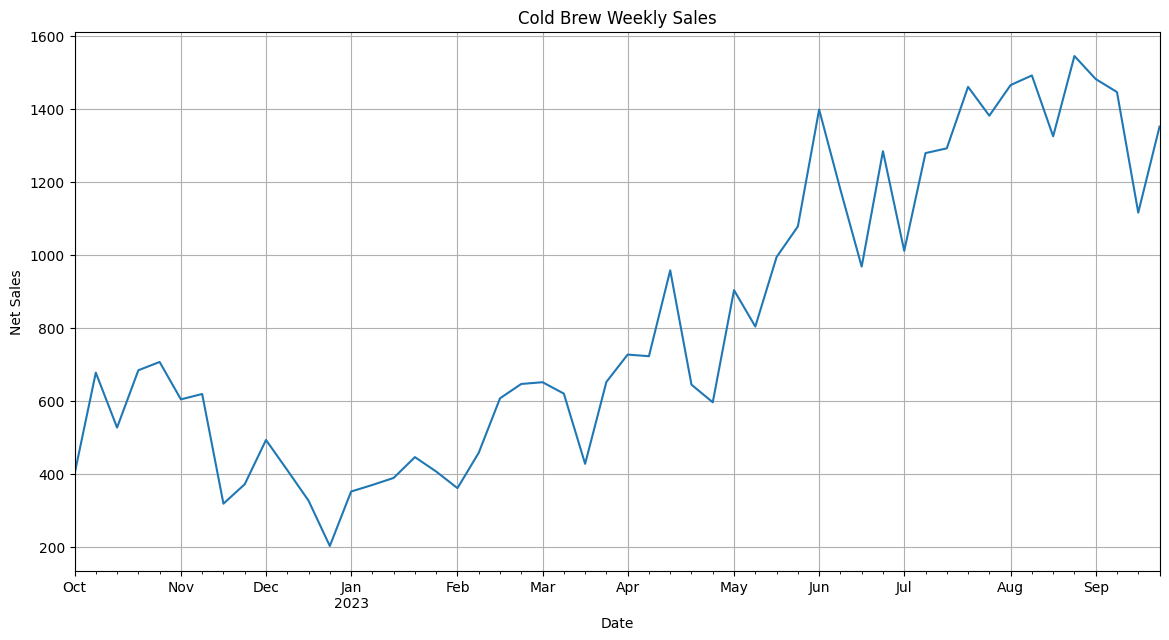

In [42]:
plt.figure(figsize=(14,7))
cold_brew_weekly.plot()
plt.title('Cold Brew Weekly Sales')
plt.ylabel('Net Sales')
plt.grid(True)
plt.show()

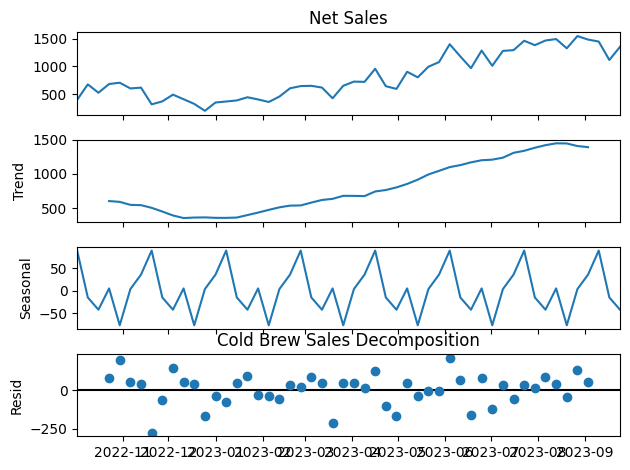

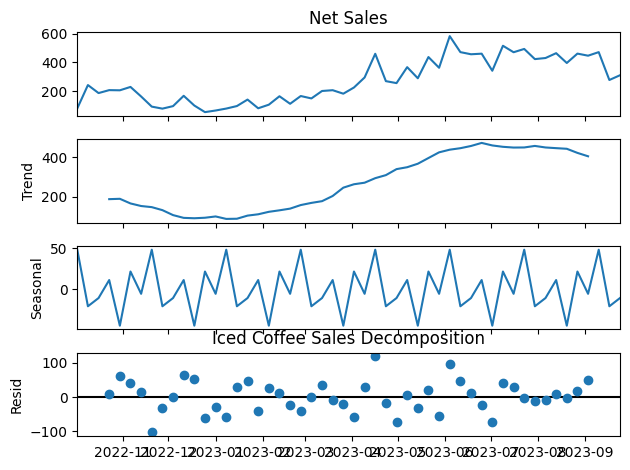

In [43]:
# Seasonal decomposition
cold_brew_decomp = seasonal_decompose(cold_brew_weekly, model='additive', period=7)
iced_coffee_decomp = seasonal_decompose(iced_coffee_weekly, model='additive', period=7)

# Plot decomposition for Cold Brew
cold_brew_decomp.plot()
plt.title('Cold Brew Sales Decomposition')
plt.show()

# Plot decomposition for Iced Coffee
iced_coffee_decomp.plot()
plt.title('Iced Coffee Sales Decomposition')
plt.show()


In [44]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    output = pd.Series(result[0:4], index=['Test Statistic', 'p-value', '# of Lags Used', 'Number of Observations Used'])

    for key, value in result[4].items():
        output[f'Critical Value ({key})'] = value

    print(output)

    if output['p-value'] <= 0.05:
        print("Strong evidence against the null hypothesis, the time series is stationary.")
    else:
        print("Weak evidence against the null hypothesis, the time series is non-stationary.")


adf_test(cold_brew_weekly)


Test Statistic                 -0.800300
p-value                         0.819034
# of Lags Used                  7.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64
Weak evidence against the null hypothesis, the time series is non-stationary.


In [45]:
cold_brew_weekly_diff = cold_brew_weekly.diff().dropna()
adf_test(cold_brew_weekly_diff)


Test Statistic                 -2.046671
p-value                         0.266491
# of Lags Used                  6.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64
Weak evidence against the null hypothesis, the time series is non-stationary.


In [46]:
cold_brew_weekly_log = np.log(cold_brew_weekly)
cold_brew_weekly_log_diff = cold_brew_weekly_log.diff().dropna()
adf_test(cold_brew_weekly_log_diff)


Test Statistic                 -3.460592
p-value                         0.009059
# of Lags Used                  4.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64
Strong evidence against the null hypothesis, the time series is stationary.


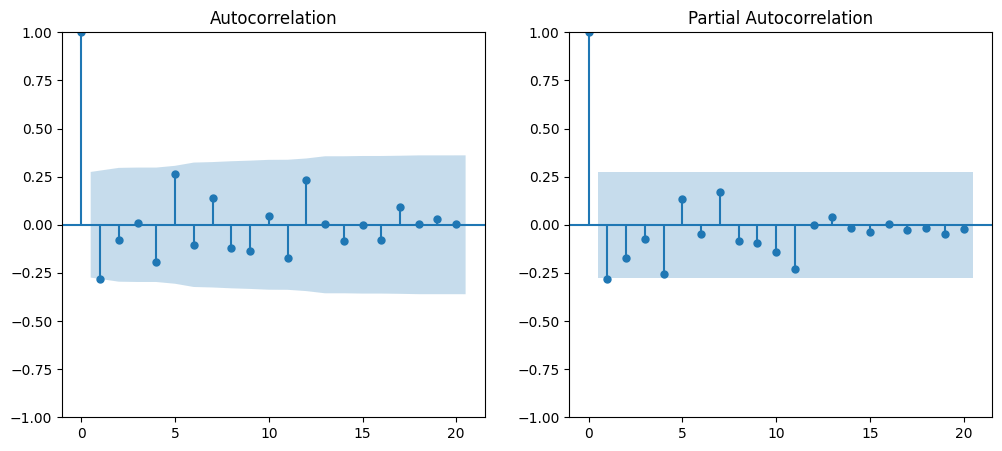

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_acf(cold_brew_weekly_log_diff, ax=plt.gca(), lags=20)
plt.subplot(122)
plot_pacf(cold_brew_weekly_log_diff, ax=plt.gca(), lags=20)
plt.show()


In [55]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf, pacf

# Assuming cold_brew_weekly_log is your time series
lag_acf = acf(cold_brew_weekly_log, nlags=20)
lag_pacf = pacf(cold_brew_weekly_log, nlags=20, method='ols')

# Print ACF values
print("ACF values:")
for i, value in enumerate(lag_acf):
    print(f"Lag {i}: {value:.3f}")

print("\nPACF values:")
for i, value in enumerate(lag_pacf):
    print(f"Lag {i}: {value:.3f}")


ACF values:
Lag 0: 1.000
Lag 1: 0.864
Lag 2: 0.819
Lag 3: 0.767
Lag 4: 0.723
Lag 5: 0.718
Lag 6: 0.654
Lag 7: 0.607
Lag 8: 0.500
Lag 9: 0.426
Lag 10: 0.388
Lag 11: 0.336
Lag 12: 0.309
Lag 13: 0.220
Lag 14: 0.141
Lag 15: 0.092
Lag 16: 0.034
Lag 17: -0.010
Lag 18: -0.070
Lag 19: -0.134
Lag 20: -0.187

PACF values:
Lag 0: 1.000
Lag 1: 0.890
Lag 2: 0.256
Lag 3: 0.144
Lag 4: 0.068
Lag 5: 0.273
Lag 6: -0.156
Lag 7: 0.055
Lag 8: -0.286
Lag 9: -0.039
Lag 10: 0.027
Lag 11: 0.081
Lag 12: 0.202
Lag 13: -0.045
Lag 14: -0.039
Lag 15: 0.019
Lag 16: 0.040
Lag 17: -0.018
Lag 18: -0.125
Lag 19: -0.116
Lag 20: -0.044


In [58]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Model orders based on ACF and PACF
p = 1  # PACF plot suggests an AR(1) component
q = 1  # ACF plot suggests an MA(1) component
D = 1  # Differencing from earlier
s = 4  # Seasonality assumed to be quarterly (4 weeks in this context)

# Define the model
# We'll also reduce the seasonal AR term to 0 based on the PACF
model = SARIMAX(cold_brew_weekly_log, order=(p, 1, q), seasonal_order=(0, D, q, s),
               enforce_stationarity=False, enforce_invertibility=False)

# Fit the model
results = model.fit()

# Print the model summary
print(results.summary())


                                     SARIMAX Results                                     
Dep. Variable:                         Net Sales   No. Observations:                   52
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 4)   Log Likelihood                   0.360
Date:                           Sat, 30 Sep 2023   AIC                              7.280
Time:                                   20:41:21   BIC                             14.134
Sample:                               10-02-2022   HQIC                             9.776
                                    - 09-24-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0379      0.509      0.074      0.941      -0.960       1.036
ma.L1         -0.4016      0.450     -0.892

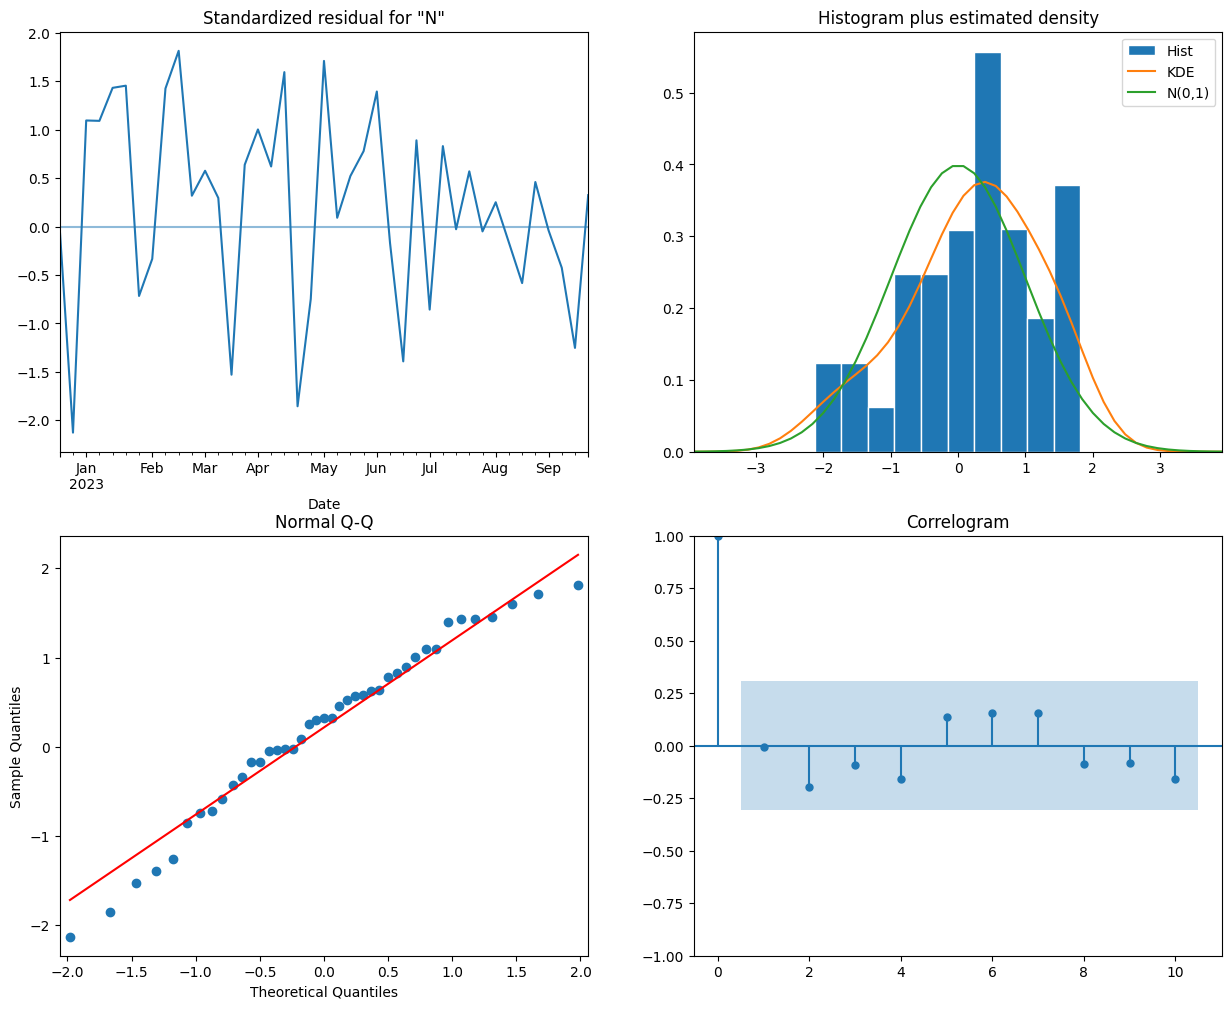

In [59]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()


In [63]:
grouped = df.groupby('Month')['Net Sales'].agg(['mean', 'std', 'var', 'median', 'min', 'max'])
print(grouped)


               mean       std        var  median    min   max
Month                                                        
April      6.043428  3.722597  13.857730    5.75 -22.00  44.0
August     6.020531  3.224784  10.399233    5.75  -6.00  60.0
December   6.260999  4.278408  18.304771    5.50  -7.25  66.0
February   5.984591  3.594656  12.921550    5.50  -7.00  44.0
January    6.047261  3.749154  14.056155    5.50  -6.75  44.0
July       6.158020  3.500218  12.251524    5.75 -10.00  44.0
June       6.065037  3.430213  11.766361    5.75  -7.75  44.0
March      5.912550  3.329965  11.088669    5.50  -9.00  40.0
May        6.018584  3.461796  11.984029    5.50 -18.00  44.0
November   5.972126  3.934804  15.482679    5.50 -18.00  72.0
October    5.877200  3.362717  11.307869    5.50  -7.00  44.0
September  6.039963  3.287568  10.808104    5.75  -6.25  44.0


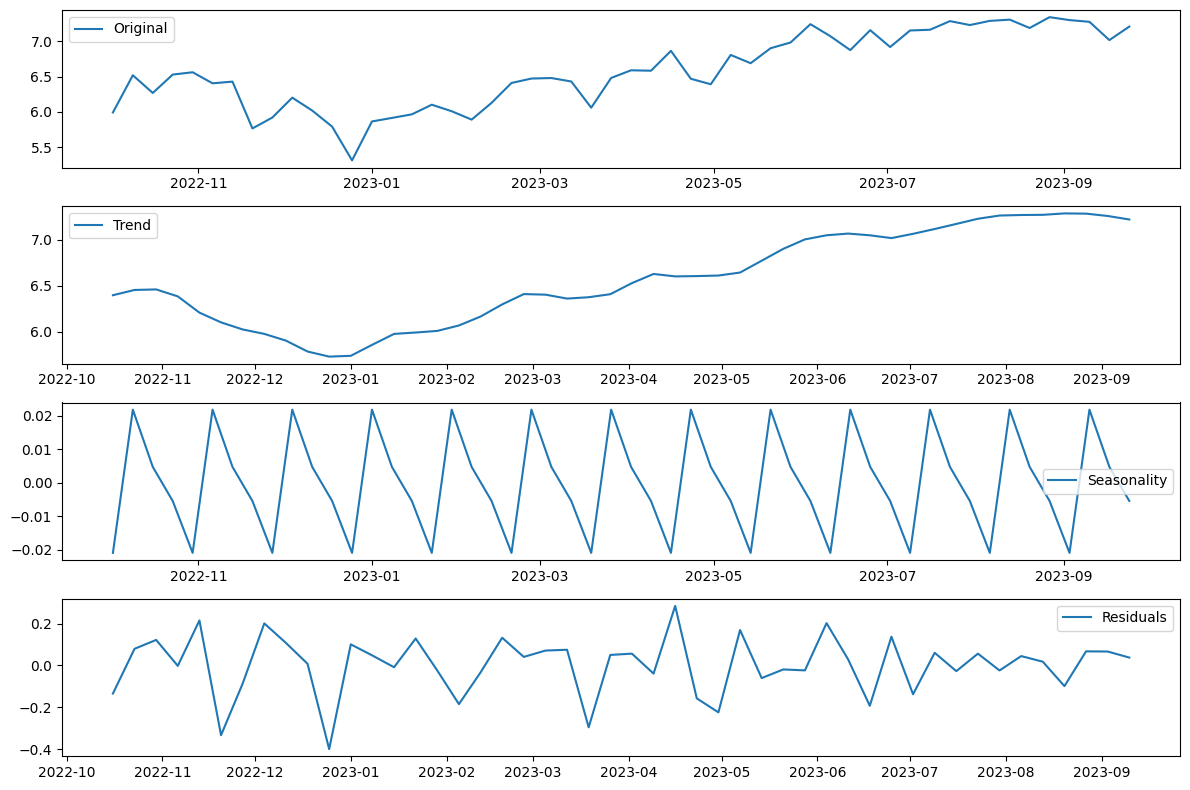

In [66]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
s = 4
decomposition = seasonal_decompose(cold_brew_weekly_log, period=s)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(cold_brew_weekly_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [68]:
from statsmodels.tsa.arima.model import ARIMA

# Define the model parameters
p = 1
d = 1
q = 1

# Define the model
model = ARIMA(cold_brew_weekly_log, order=(p,d,q))

# Fit the model
results = model.fit()

# Print the model summary
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:              Net Sales   No. Observations:                   52
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   2.325
Date:                Sat, 30 Sep 2023   AIC                              1.349
Time:                        20:51:41   BIC                              7.145
Sample:                    10-02-2022   HQIC                             3.564
                         - 09-24-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1704      0.440      0.387      0.699      -0.692       1.033
ma.L1         -0.5438      0.363     -1.499      0.134      -1.255       0.167
sigma2         0.0533      0.010      5.554      0.0

In [69]:
import pandas as pd

# Assuming cold_brew_weekly_log is your series
window_size = 4  # this is a choice you might want to adjust

# Compute moving averages
moving_avg = cold_brew_weekly_log.rolling(window=window_size).mean()

# The forecast for the next point would be the last value of this moving_avg series
forecast_next = moving_avg.iloc[-1]

print("Forecast for the next week:", forecast_next)


Forecast for the next week: 7.201057561127825


In [70]:
from sklearn.metrics import mean_absolute_error

# Drop the first (window_size-1) values as they don't have moving averages
actual_values = cold_brew_weekly_log[window_size-1:]
predicted_values = moving_avg[window_size-1:]

mae = mean_absolute_error(actual_values, predicted_values)
print(f"Mean Absolute Error for the Moving Average Model: {mae}")


Mean Absolute Error for the Moving Average Model: 0.1418652906134894


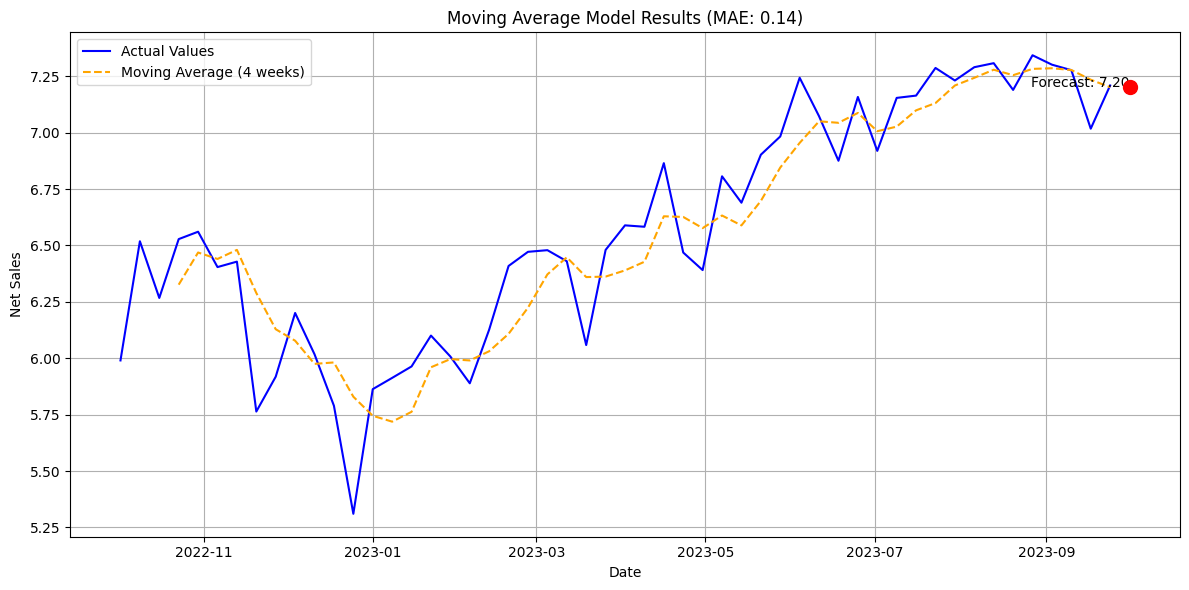

In [71]:
import matplotlib.pyplot as plt

# Plotting the original time series
plt.figure(figsize=(12, 6))
plt.plot(cold_brew_weekly_log, label="Actual Values", color="blue")

# Overlay the moving averages
plt.plot(moving_avg, label=f"Moving Average ({window_size} weeks)", color="orange", linestyle='--')

# Mark the forecasted point for the next week
next_week_date = cold_brew_weekly_log.index[-1] + pd.Timedelta(weeks=1)
plt.scatter(next_week_date, forecast_next, color="red", s=100, zorder=5)
plt.text(next_week_date, forecast_next, f'Forecast: {forecast_next:.2f}', horizontalalignment='right')

# Displaying MAE and other details on the plot
plt.title(f"Moving Average Model Results (MAE: {mae:.2f})")
plt.xlabel("Date")
plt.ylabel("Net Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [86]:
model = ExponentialSmoothing(cold_brew_weekly_log, trend='additive', seasonal=None)
model_fit = model.fit()


In [87]:
forecast_periods = 10  # Number of periods you want to forecast into the future
forecast = model_fit.forecast(steps=forecast_periods)


In [90]:
forecast_index = pd.date_range(cold_brew_weekly_log.index[-1], periods=forecast_periods+1, closed='right')


<ipython-input-90-ed4c9b8f2cbb>:1: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(cold_brew_weekly_log.index[-1], periods=forecast_periods+1, closed='right')


In [91]:
forecast_series = pd.Series(forecast, index=forecast_index)


In [89]:
forecast

2023-10-01    7.213803
2023-10-08    7.233657
2023-10-15    7.253511
2023-10-22    7.273365
2023-10-29    7.293219
2023-11-05    7.313073
2023-11-12    7.332927
2023-11-19    7.352781
2023-11-26    7.372635
2023-12-03    7.392489
Freq: W-SUN, dtype: float64

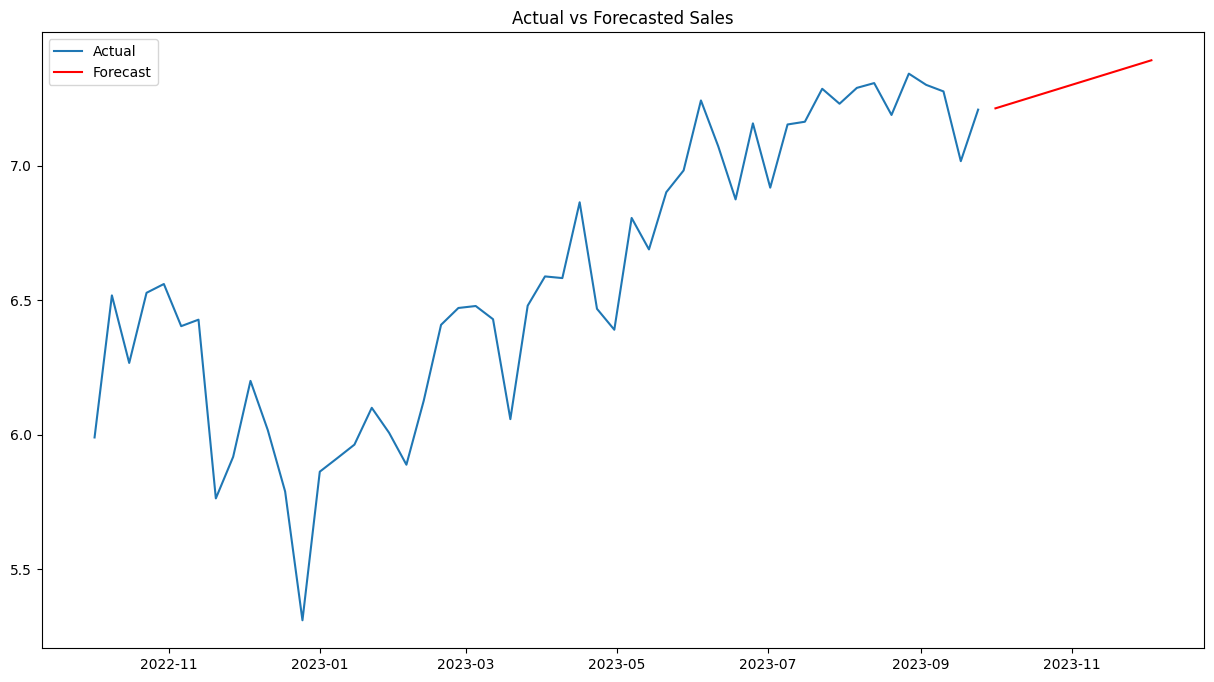

In [93]:
plt.figure(figsize=(15,8))
plt.plot(cold_brew_weekly_log, label='Actual')
plt.plot(forecast, color='red', label='Forecast')
plt.legend()
plt.title("Actual vs Forecasted Sales")
plt.show()


In [102]:
import itertools
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

# Split the data into training and testing sets
train_size = int(len(cold_brew_weekly_log) * 0.8)
train, test = cold_brew_weekly_log[:train_size], cold_brew_weekly_log[train_size:]

# Define a range of ARIMA parameters to test
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

best_score, best_cfg = float("inf"), None

# Perform grid search for ARIMA parameters
for p, d, q in itertools.product(p_values, d_values, q_values):
    order = (p, d, q)
    try:
        # Fit ARIMA model
        model = sm.tsa.ARIMA(train, order=order)
        model_fit = model.fit()
        # Make forecasts
        forecasts = model_fit.forecast(steps=len(test))
        # Calculate RMSE
        rmse = sqrt(mean_squared_error(test, forecasts))
        # Update best parameters if RMSE is lower
        if rmse < best_score:
            best_score, best_cfg = rmse, order
    except:
        continue

print(f"Best ARIMA Order: {best_cfg} with RMSE: {best_score}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Best ARIMA Order: (0, 1, 0) with RMSE: 0.1210690162440056


<ipython-input-105-ddb2a7654d14>:9: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=test.index[-1], periods=forecast_horizon + 1, closed='right')


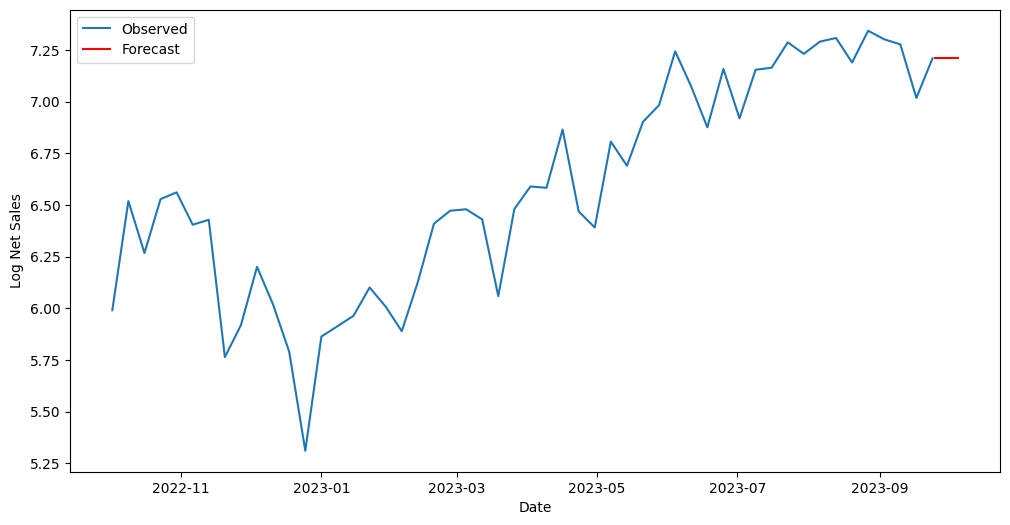

In [105]:
import statsmodels.api as sm

# Fit the ARIMA model with the best order
model = sm.tsa.ARIMA(cold_brew_weekly_log, order=(0, 1, 0))
model_fit = model.fit()

# Make forecasts
forecast_horizon = len(test)
forecast_index = pd.date_range(start=test.index[-1], periods=forecast_horizon + 1, closed='right')
forecasts = model_fit.forecast(steps=forecast_horizon)

# Plot the forecasts
plt.figure(figsize=(12, 6))
plt.plot(cold_brew_weekly_log, label='Observed')
plt.plot(forecast_index, forecasts, color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Log Net Sales')
plt.legend()
plt.show()


In [108]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.7 MB/s eta 0:00:00


In [124]:
import pmdarima as pm
from sklearn.metrics import mean_squared_error
from math import sqrt

# Split the data into training and testing sets
train_size = int(len(cold_brew_weekly_log) * 0.7)
train, test = cold_brew_weekly_log[:train_size], cold_brew_weekly_log[train_size:]

In [125]:
import itertools
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt


# Define a range of ARIMA parameters to test
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

best_score, best_cfg = float("inf"), None

# Perform grid search for ARIMA parameters
for p, d, q in itertools.product(p_values, d_values, q_values):
    order = (p, d, q)
    try:
        # Fit ARIMA model
        model = sm.tsa.ARIMA(train, order=order)
        model_fit = model.fit()
        # Make forecasts
        forecasts = model_fit.forecast(steps=len(test))
        # Calculate RMSE
        rmse = sqrt(mean_squared_error(test, forecasts))
        # Update best parameters if RMSE is lower
        if rmse < best_score:
            best_score, best_cfg = rmse, order
    except Exception as e:
        print(f"Error for order {order}: {e}")
        continue

print(f"Best ARIMA Order: {best_cfg} with RMSE: {best_score}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py

Best ARIMA Order: (2, 1, 0) with RMSE: 0.1353958190879142


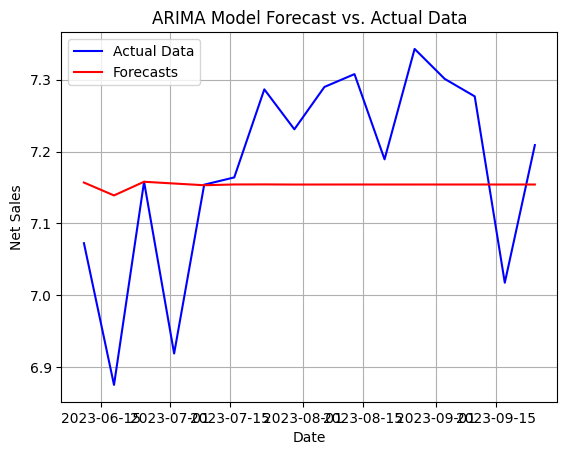

In [126]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define the ARIMA order
p, d, q = 2, 1, 0
order = (p, d, q)
# Fit ARIMA model
model = sm.tsa.ARIMA(train, order=order)
model_fit = model.fit()

# Make forecasts
forecasts = model_fit.forecast(steps=len(test))

# Plot the actual data
plt.plot(test.index, test.values, label='Actual Data', color='blue')

# Plot the forecasts
plt.plot(test.index, forecasts, label='Forecasts', color='red')

plt.xlabel('Date')
plt.ylabel('Net Sales')
plt.legend()
plt.title('ARIMA Model Forecast vs. Actual Data')
plt.grid(True)
plt.show()


In [130]:
pip install prophet


In [153]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Convert the Series to a DataFrame
cold_brew_weekly_log_df = pd.DataFrame({'ds': cold_brew_weekly_log.index, 'y': cold_brew_weekly_log.values})

# Define the ratio for the split (e.g., 70% training, 30% testing)
train_ratio = 0.7
test_ratio = 1 - train_ratio

# Split the data into training and test sets
train_data, test_data = train_test_split(cold_brew_weekly_log_df, test_size=test_ratio, shuffle=False)

# Optionally, reset the index for the new DataFrames
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Print the first few rows of each dataset to verify the split
print("Training Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())


Training Data:
          ds         y
0 2022-10-02  5.990214
1 2022-10-09  6.518410
2 2022-10-16  6.267201
3 2022-10-23  6.527958
4 2022-10-30  6.560677

Test Data:
          ds         y
0 2023-06-11  7.072422
1 2023-06-18  6.875232
2 2023-06-25  7.157930
3 2023-07-02  6.918942
4 2023-07-09  7.153834


In [154]:
train_data.shape

(36, 2)

In [155]:
test_data.shape

(16, 2)

In [157]:
from prophet import Prophet

# Now, you can fit the Prophet model
model = Prophet()
model.fit(train_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzcijbi9p/ti_k3qml.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzcijbi9p/zvonwf1h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84522', 'data', 'file=/tmp/tmpzcijbi9p/ti_k3qml.json', 'init=/tmp/tmpzcijbi9p/zvonwf1h.json', 'output', 'file=/tmp/tmpzcijbi9p/prophet_modeloz4hgknq/prophet_model-20230930214854.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:48:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:48:55 - cmdstanpy - INFO - Chai

In [193]:
future = model.make_future_dataframe(periods=10, freq='W-SUN')
forecast = model.predict(future)


In [195]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Extract the actual values from the test set
actual_values = test_data['y'].values

# Extract the forecasted values from the Prophet forecast
forecast_values = forecast['yhat'].tail(len(test_data)).values

# Calculate MAE and RMSE
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mean_squared_error(actual_values, forecast_values))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 0.19531048645521848
Root Mean Squared Error: 0.2248986079586268


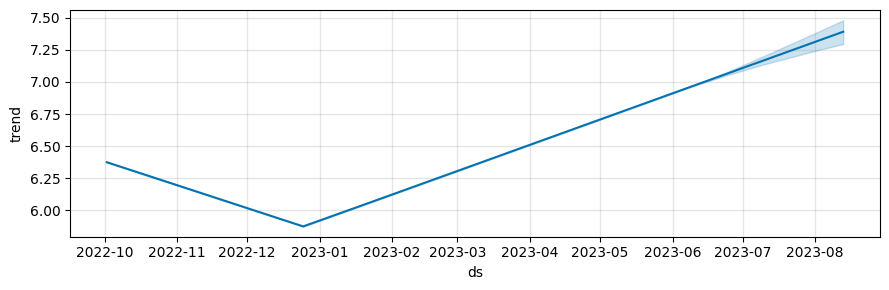

In [200]:
fig_components = model.plot_components(forecast)
